In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
label=LabelEncoder()
stnd=StandardScaler()
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
custom_palette = ["#99e6b3", "#7fffd4", "#66cdaa", "#00ffff", "#29ab87"]
palette1 = ["#000000", "#696969", "#E6E6FA", "#008080", "#FF7F50"]
palette2 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [4]:
df.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


### Unique Values

In [5]:
for i in df.columns:
    print(i,'-->',df[i].unique())
    print('-'*30)

Roll no --> ['EXA000001' 'EXA000002' 'EXA000003' ... 'EXA031997' 'EXA031998'
 'EXA031999']
------------------------------
test preparation  --> ['none' 'completed']
------------------------------
gender --> ['male' 'female']
------------------------------
parental level of education --> ['some college' "master's degree" 'high school' "associate's degree"
 'some high school' "bachelor's degree"]
------------------------------
lunch --> ['standard' 'free/reduced']
------------------------------
Section --> ['Section A' 'Section C' 'Section E' 'Section D' 'Section B']
------------------------------
practical score --> [ 70  55  56  35  87  80  65  66  67  89  99  74  58  90  68  69  32  82
  57  46  76  86  52  63  96  59  62  79  71  61  75  73  83  64  23  41
  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60  93
  77  53  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]
------------------------------
viva score --> [ 73  54 

### Number  of Unique Values

In [6]:
for i in df.columns:
    print(i,'-->',len(df[i].unique()))
    print('-'*30)

Roll no --> 31999
------------------------------
test preparation  --> 2
------------------------------
gender --> 2
------------------------------
parental level of education --> 6
------------------------------
lunch --> 2
------------------------------
Section --> 5
------------------------------
practical score --> 79
------------------------------
viva score --> 71
------------------------------
exam score --> 74
------------------------------


In [7]:
df.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df1=df.sort_values(by='exam score',ascending=True)
df1

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
27907,EXA027908,none,male,some high school,standard,Section D,74,91,15
28885,EXA028886,none,female,some high school,free/reduced,Section C,51,71,15
1193,EXA001194,none,male,some college,standard,Section C,69,62,15
215,EXA000216,none,male,high school,free/reduced,Section C,20,25,15
6149,EXA006150,none,female,some high school,standard,Section C,69,69,15
...,...,...,...,...,...,...,...,...,...
18355,EXA018356,none,female,some high school,standard,Section D,63,86,100
5213,EXA005214,none,male,high school,standard,Section C,77,54,100
9776,EXA009777,completed,male,associate's degree,free/reduced,Section A,58,83,100
1697,EXA001698,none,male,some college,standard,Section C,65,77,100


## EDA

### Exam Score

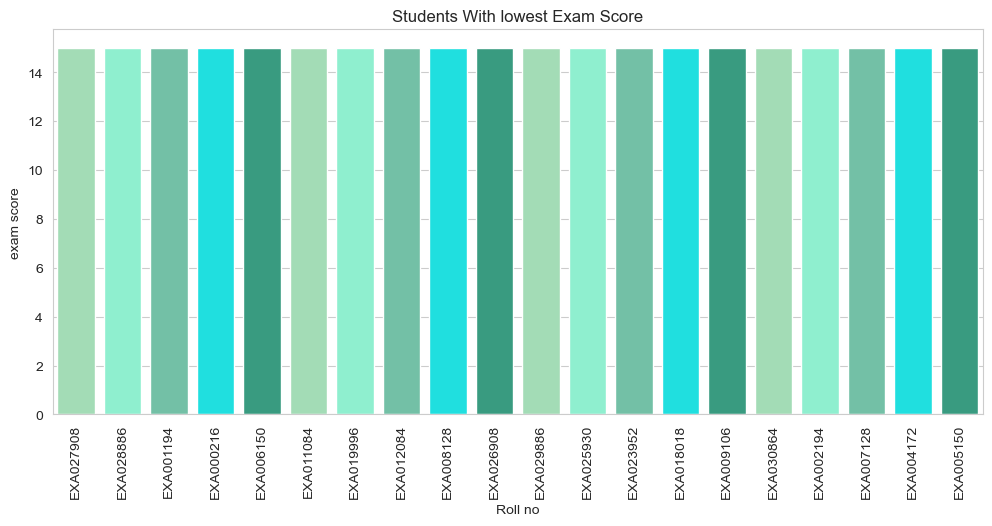

In [10]:
plt.figure(figsize=(12,5))
plt.title('Students With lowest Exam Score')
sns.barplot(x='Roll no',y='exam score',data=df1[:20],palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)

In [11]:
df1[df1['exam score']==15]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
27907,EXA027908,none,male,some high school,standard,Section D,74,91,15
28885,EXA028886,none,female,some high school,free/reduced,Section C,51,71,15
1193,EXA001194,none,male,some college,standard,Section C,69,62,15
215,EXA000216,none,male,high school,free/reduced,Section C,20,25,15
6149,EXA006150,none,female,some high school,standard,Section C,69,69,15
11083,EXA011084,none,female,associate's degree,standard,Section C,76,64,15
19995,EXA019996,completed,male,associate's degree,free/reduced,Section A,35,56,15
12083,EXA012084,none,female,master's degree,standard,Section C,76,84,15
8127,EXA008128,none,female,associate's degree,standard,Section A,43,73,15
26907,EXA026908,completed,male,some high school,standard,Section D,82,73,15


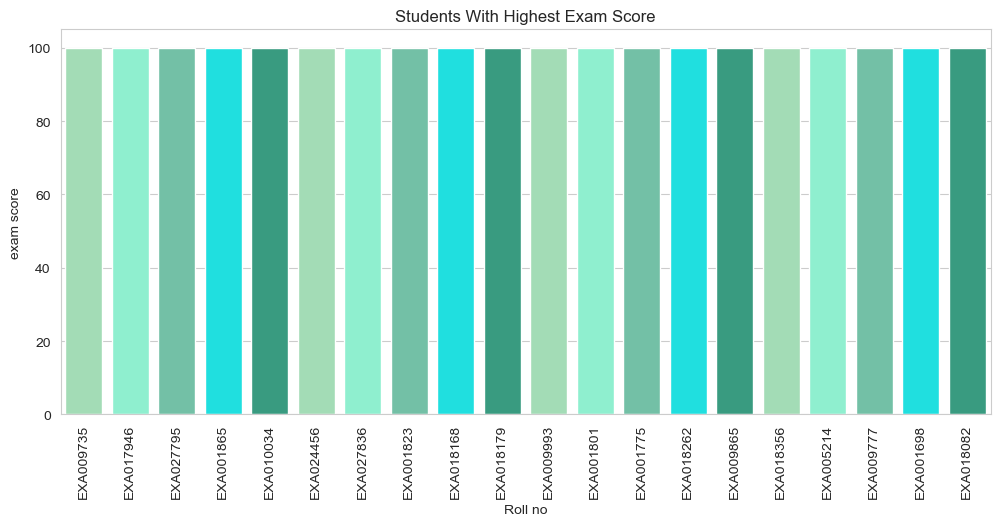

In [12]:
plt.figure(figsize=(12,5))
plt.title('Students With Highest Exam Score')
sns.barplot(x='Roll no',y='exam score',data=df1.tail(20),palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)

In [13]:
df1[df1['exam score']==100]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
21580,EXA021581,none,male,associate's degree,standard,Section B,78,72,100
22217,EXA022218,none,female,high school,standard,Section C,42,81,100
22123,EXA022124,none,female,associate's degree,free/reduced,Section B,53,76,100
6036,EXA006037,completed,male,associate's degree,free/reduced,Section A,63,77,100
7277,EXA007278,none,male,some high school,free/reduced,Section D,58,70,100
...,...,...,...,...,...,...,...,...,...
18355,EXA018356,none,female,some high school,standard,Section D,63,86,100
5213,EXA005214,none,male,high school,standard,Section C,77,54,100
9776,EXA009777,completed,male,associate's degree,free/reduced,Section A,58,83,100
1697,EXA001698,none,male,some college,standard,Section C,65,77,100


### VIVA SCORE

In [14]:
df2=df.sort_values('viva score')
df2

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
12038,EXA012039,none,female,associate's degree,standard,Section D,43,25,70
28788,EXA028789,none,male,associate's degree,standard,Section D,69,25,55
29788,EXA029789,none,female,some college,free/reduced,Section D,60,25,55
22877,EXA022878,completed,male,bachelor's degree,standard,Section C,85,25,81
26828,EXA026829,completed,male,some high school,standard,Section E,86,25,80
...,...,...,...,...,...,...,...,...,...
25189,EXA025190,completed,female,some high school,free/reduced,Section C,67,100,81
19548,EXA019549,none,female,associate's degree,standard,Section C,83,100,50
3328,EXA003329,none,female,associate's degree,standard,Section A,57,100,64
6671,EXA006672,none,female,high school,standard,Section E,65,100,73


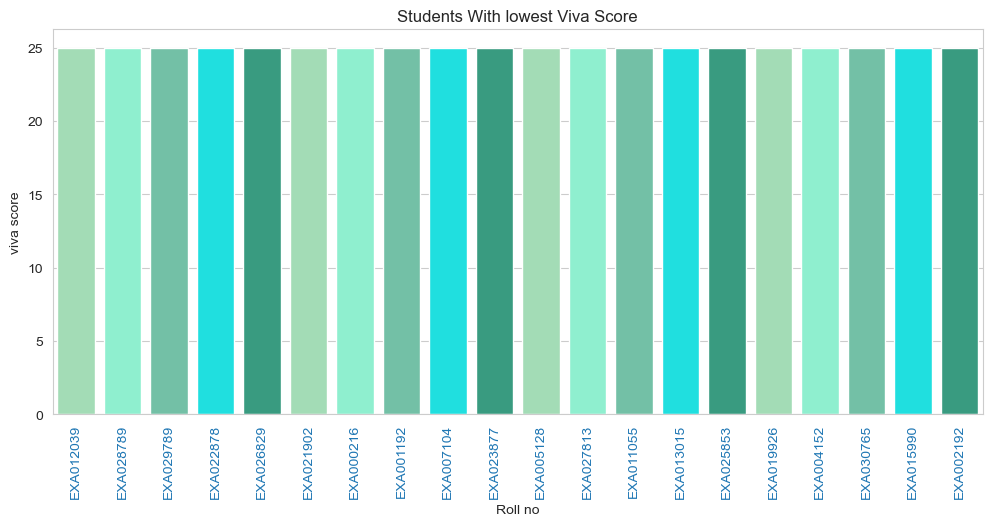

In [15]:
color = 'tab:blue'
plt.figure(figsize=(12,5))
plt.title('Students With lowest Viva Score')
sns.barplot(x='Roll no',y='viva score',data=df2[:20],palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90,labelcolor=color)

In [16]:
df2[df2['viva score']==25]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
12038,EXA012039,none,female,associate's degree,standard,Section D,43,25,70
28788,EXA028789,none,male,associate's degree,standard,Section D,69,25,55
29788,EXA029789,none,female,some college,free/reduced,Section D,60,25,55
22877,EXA022878,completed,male,bachelor's degree,standard,Section C,85,25,81
26828,EXA026829,completed,male,some high school,standard,Section E,86,25,80
21901,EXA021902,completed,male,some college,standard,Section D,47,25,100
215,EXA000216,none,male,high school,free/reduced,Section C,20,25,15
1191,EXA001192,none,female,associate's degree,standard,Section B,66,25,88
7103,EXA007104,completed,female,some college,standard,Section B,47,25,77
23876,EXA023877,completed,female,some college,free/reduced,Section C,62,25,51


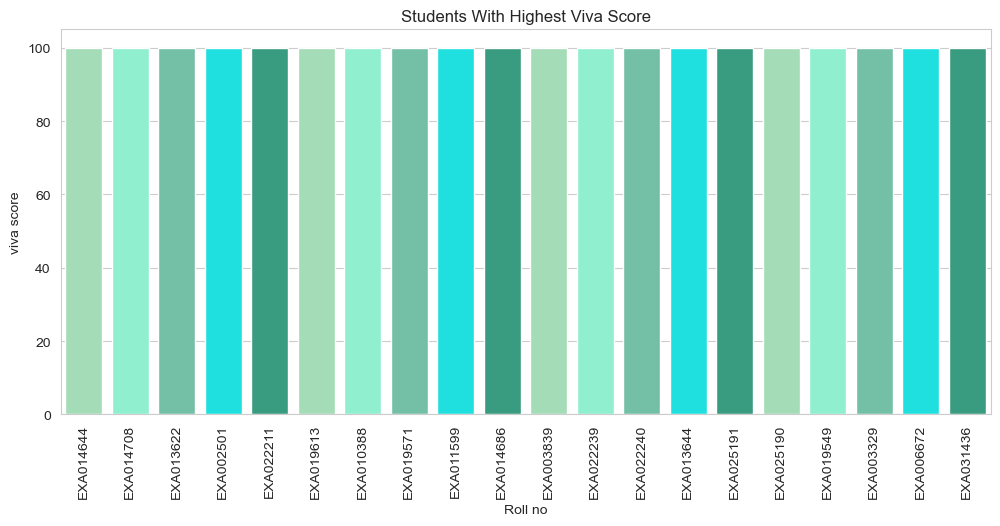

In [17]:
plt.figure(figsize=(12,5))
plt.title('Students With Highest Viva Score')
sns.barplot(x='Roll no',y='viva score',data=df2.tail(20),palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)

In [18]:
df2[df2['viva score']==100]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
17594,EXA017595,none,female,associate's degree,free/reduced,Section B,70,100,55
8440,EXA008441,completed,female,some high school,standard,Section D,81,100,62
6464,EXA006465,completed,female,bachelor's degree,free/reduced,Section C,62,100,77
30925,EXA030926,completed,female,some college,standard,Section E,69,100,43
5671,EXA005672,none,female,associate's degree,free/reduced,Section D,65,100,73
...,...,...,...,...,...,...,...,...,...
25189,EXA025190,completed,female,some high school,free/reduced,Section C,67,100,81
19548,EXA019549,none,female,associate's degree,standard,Section C,83,100,50
3328,EXA003329,none,female,associate's degree,standard,Section A,57,100,64
6671,EXA006672,none,female,high school,standard,Section E,65,100,73


### Practical Score

In [19]:
df3=df.sort_values('practical score')
df3

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
4565,EXA004566,none,male,some high school,standard,Section D,15,68,45
26487,EXA026488,completed,male,high school,standard,Section C,15,45,83
6561,EXA006562,none,male,some college,standard,Section E,15,84,67
20516,EXA020517,completed,female,master's degree,standard,Section C,15,67,63
12532,EXA012533,none,male,high school,standard,Section C,15,55,72
...,...,...,...,...,...,...,...,...,...
28100,EXA028101,completed,female,high school,standard,Section C,100,75,68
4192,EXA004193,none,male,associate's degree,free/reduced,Section D,100,59,61
13320,EXA013321,none,male,some college,free/reduced,Section C,100,63,89
16795,EXA016796,none,female,associate's degree,standard,Section E,100,86,90


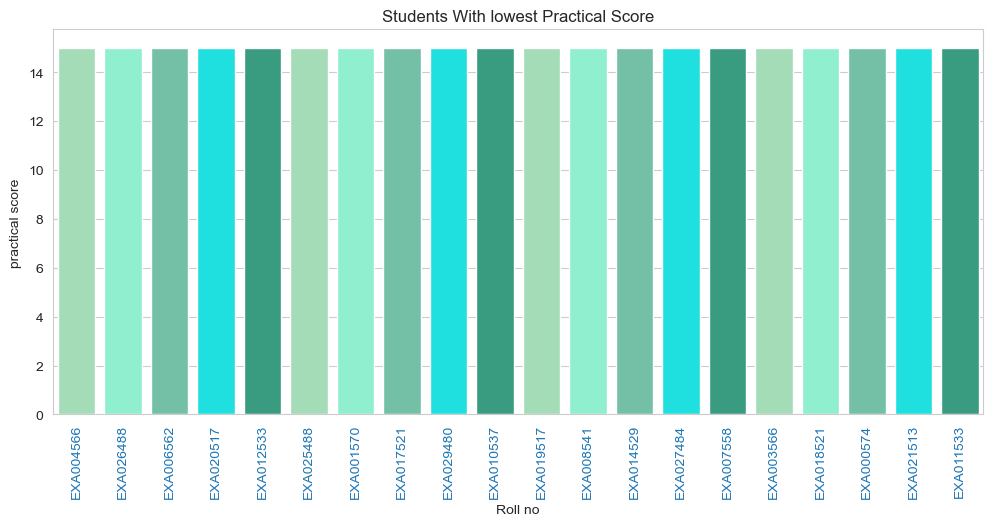

In [20]:
color = 'tab:blue'
plt.figure(figsize=(12,5))
plt.title('Students With lowest Practical Score')
sns.barplot(x='Roll no',y='practical score',data=df3[:20],palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90,labelcolor=color)

In [21]:
df3[df3['practical score']==15]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
4565,EXA004566,none,male,some high school,standard,Section D,15,68,45
26487,EXA026488,completed,male,high school,standard,Section C,15,45,83
6561,EXA006562,none,male,some college,standard,Section E,15,84,67
20516,EXA020517,completed,female,master's degree,standard,Section C,15,67,63
12532,EXA012533,none,male,high school,standard,Section C,15,55,72
25487,EXA025488,none,male,some college,free/reduced,Section D,15,45,83
1569,EXA001570,none,female,master's degree,standard,Section A,15,77,63
17520,EXA017521,none,female,some college,standard,Section B,15,86,69
29479,EXA029480,completed,male,associate's degree,standard,Section A,15,84,61
10536,EXA010537,none,female,associate's degree,standard,Section B,15,67,84


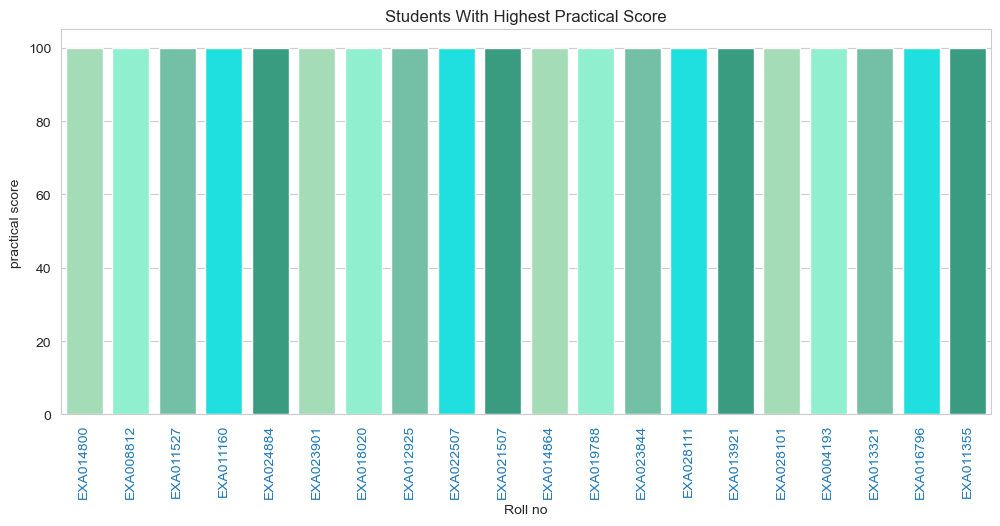

In [22]:
color = 'tab:blue'
plt.figure(figsize=(12,5))
plt.title('Students With Highest Practical Score')
sns.barplot(x='Roll no',y='practical score',data=df3.tail(20),palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90,labelcolor=color)

In [23]:
df3[df3['practical score']==100]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
6832,EXA006833,completed,female,associate's degree,free/reduced,Section C,100,58,67
1391,EXA001392,none,female,bachelor's degree,standard,Section B,100,68,58
29271,EXA029272,none,female,some high school,free/reduced,Section B,100,59,61
3387,EXA003388,none,male,associate's degree,standard,Section E,100,86,47
26309,EXA026310,none,male,associate's degree,standard,Section D,100,74,66
...,...,...,...,...,...,...,...,...,...
28100,EXA028101,completed,female,high school,standard,Section C,100,75,68
4192,EXA004193,none,male,associate's degree,free/reduced,Section D,100,59,61
13320,EXA013321,none,male,some college,free/reduced,Section C,100,63,89
16795,EXA016796,none,female,associate's degree,standard,Section E,100,86,90


### AVERAGE SCORE

In [24]:
df['Average Score']=(df['practical score']+df['viva score']+df['exam score'])/3

In [25]:
df4=df.sort_values('Average Score')
df4

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score,Average Score
215,EXA000216,none,male,high school,free/reduced,Section C,20,25,15,20.000000
363,EXA000364,none,male,high school,standard,Section C,31,27,19,25.666667
467,EXA000468,none,female,high school,standard,Section C,21,30,26,25.666667
969,EXA000970,none,male,some high school,standard,Section C,28,27,23,26.000000
500,EXA000501,none,female,associate's degree,free/reduced,Section C,28,32,28,29.333333
...,...,...,...,...,...,...,...,...,...,...
759,EXA000760,completed,female,bachelor's degree,standard,Section E,98,100,99,99.000000
908,EXA000909,completed,male,associate's degree,standard,Section D,100,100,98,99.333333
553,EXA000554,completed,male,associate's degree,standard,Section D,99,100,100,99.666667
365,EXA000366,completed,male,bachelor's degree,standard,Section D,100,100,100,100.000000


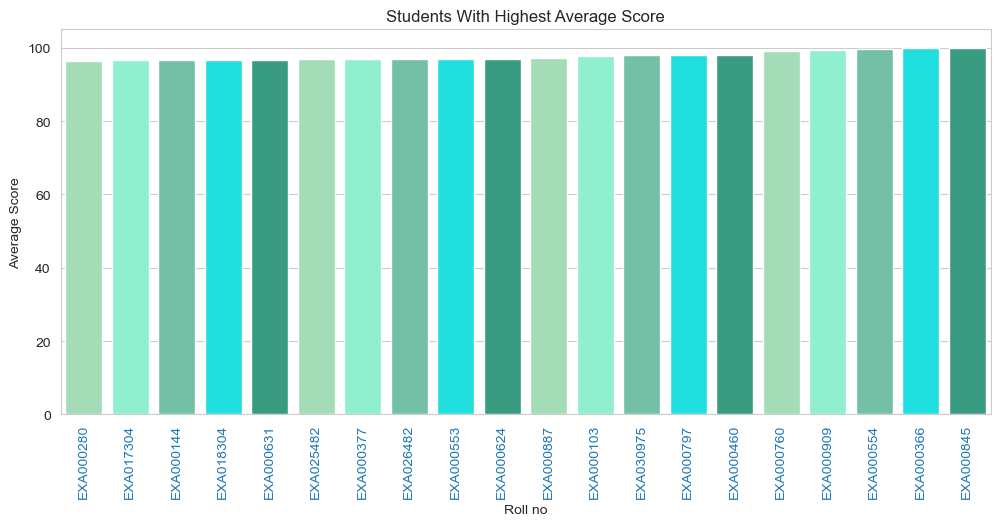

In [26]:
color = 'tab:blue'
plt.figure(figsize=(12,5))
plt.title('Students With Highest Average Score')
sns.barplot(x='Roll no',y='Average Score',data=df4.tail(20),palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90,labelcolor=color)

In [27]:
df4[df4['Average Score']==100]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score,Average Score
365,EXA000366,completed,male,bachelor's degree,standard,Section D,100,100,100,100.0
844,EXA000845,completed,male,bachelor's degree,standard,Section E,100,100,100,100.0


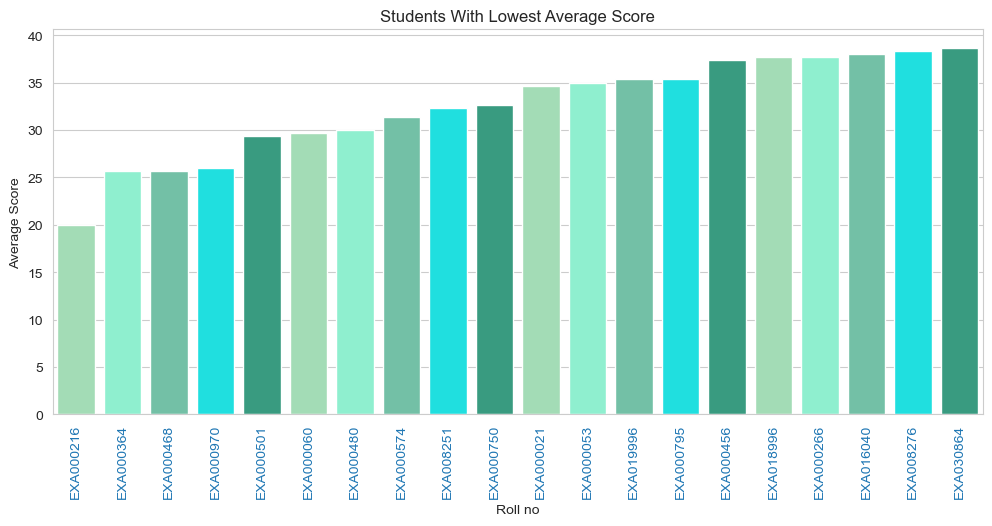

In [28]:
color = 'tab:blue'
plt.figure(figsize=(12,5))
plt.title('Students With Lowest Average Score')
sns.barplot(x='Roll no',y='Average Score',data=df4.head(20),palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90,labelcolor=color)

In [29]:
df4[df4['Average Score']<=40]

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score,Average Score
215,EXA000216,none,male,high school,free/reduced,Section C,20,25,15,20.000000
363,EXA000364,none,male,high school,standard,Section C,31,27,19,25.666667
467,EXA000468,none,female,high school,standard,Section C,21,30,26,25.666667
969,EXA000970,none,male,some high school,standard,Section C,28,27,23,26.000000
500,EXA000501,none,female,associate's degree,free/reduced,Section C,28,32,28,29.333333
59,EXA000060,none,female,some high school,standard,Section C,23,33,33,29.666667
479,EXA000480,none,female,some high school,standard,Section D,25,33,32,30.000000
573,EXA000574,none,female,high school,free/reduced,Section D,15,39,40,31.333333
8250,EXA008251,completed,female,associate's degree,free/reduced,Section C,27,27,43,32.333333
749,EXA000750,none,male,high school,free/reduced,Section C,34,37,27,32.666667


In [30]:
df.drop('Roll no',axis=1,inplace=True)

### Gender

<Axes: title={'center': 'Value Counts For Female And Male'}, xlabel='gender', ylabel='count'>

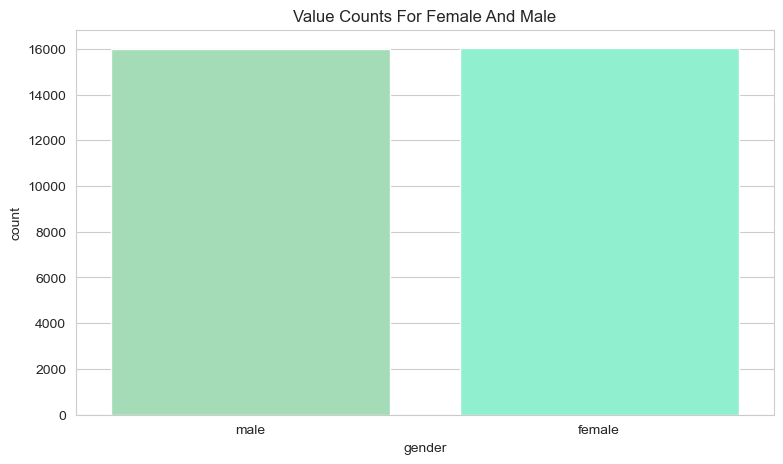

In [31]:
plt.figure(figsize=(9,5))
plt.title('Value Counts For Female And Male')
sns.countplot(x=df['gender'],palette=custom_palette)

In [32]:
gengrp=df.groupby('gender').agg('mean')

In [33]:
gengrp

,practical score,viva score,exam score,Average Score
gender,,,,
female,67.658911,70.541513,69.255692,69.152039
male,68.021543,70.208166,69.023046,69.084252


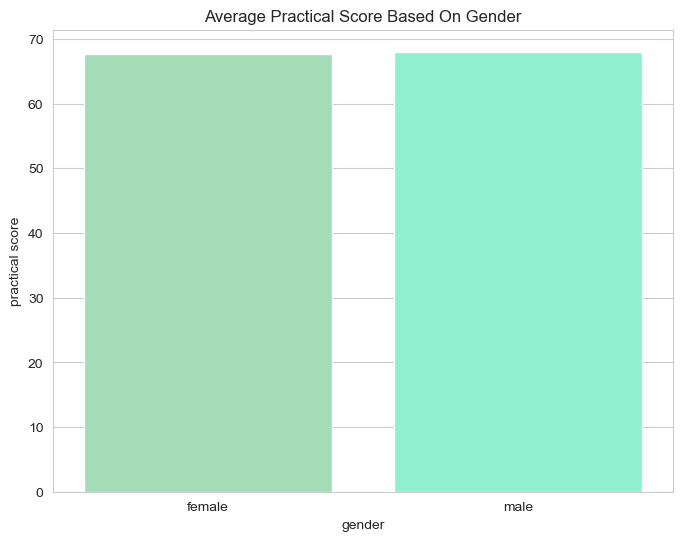

In [34]:
plt.figure(figsize=(8,6))
plt.title('Average Practical Score Based On Gender')
sns.barplot(x=gengrp.index,y='practical score',data=gengrp,palette=custom_palette)
plt.show()

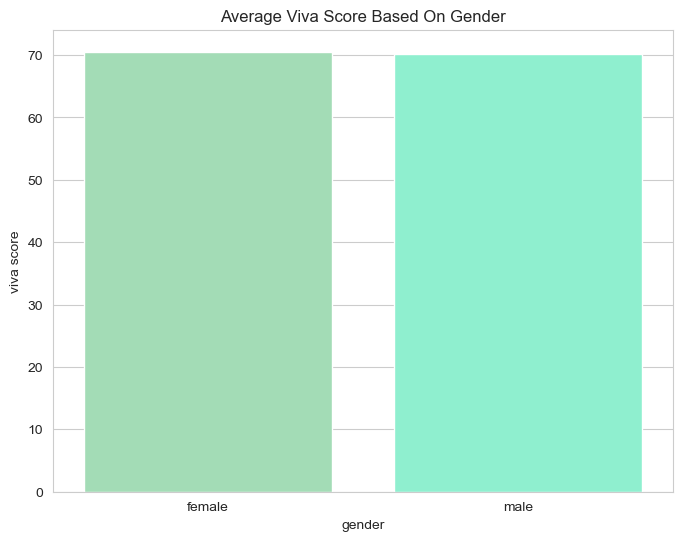

In [35]:
plt.figure(figsize=(8,6))
plt.title('Average Viva Score Based On Gender')
sns.barplot(x=gengrp.index,y='viva score',data=gengrp,palette=custom_palette)
plt.show()

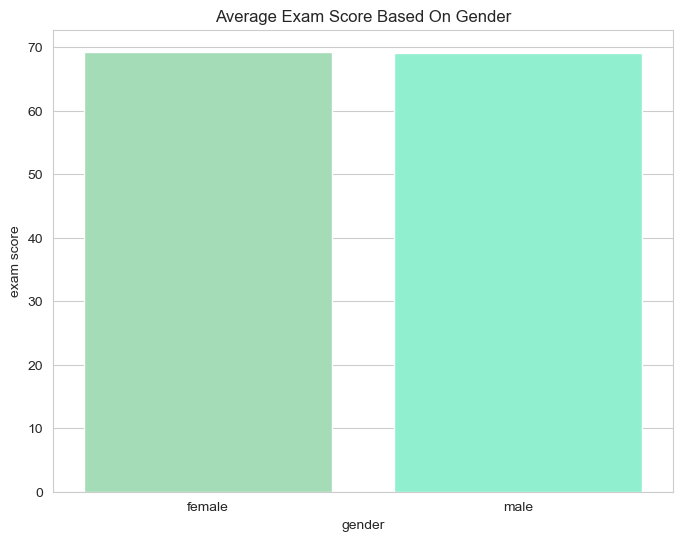

In [36]:
plt.figure(figsize=(8,6))
plt.title('Average Exam Score Based On Gender')
sns.barplot(x=gengrp.index,y='exam score',data=gengrp,palette=custom_palette)
plt.show()

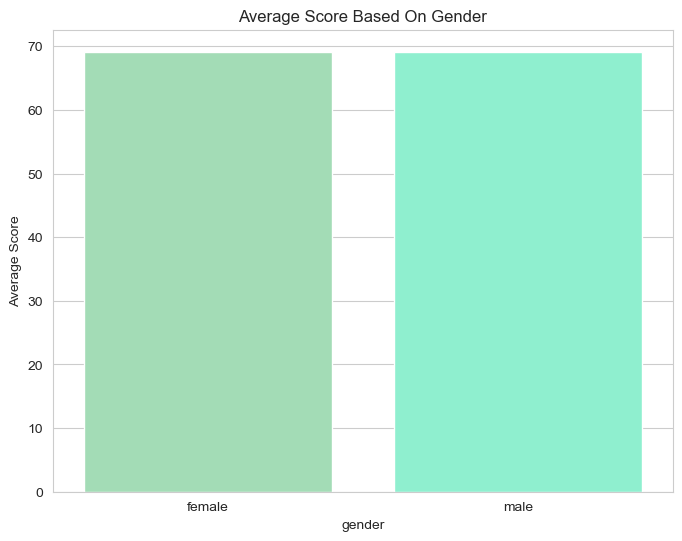

In [37]:
plt.figure(figsize=(8,6))
plt.title('Average Score Based On Gender')
sns.barplot(x=gengrp.index,y='Average Score',data=gengrp,palette=custom_palette)
plt.show()

### Test Preparation 

<Axes: title={'center': 'Value Counts Based on Test preparation'}, xlabel='test preparation ', ylabel='count'>

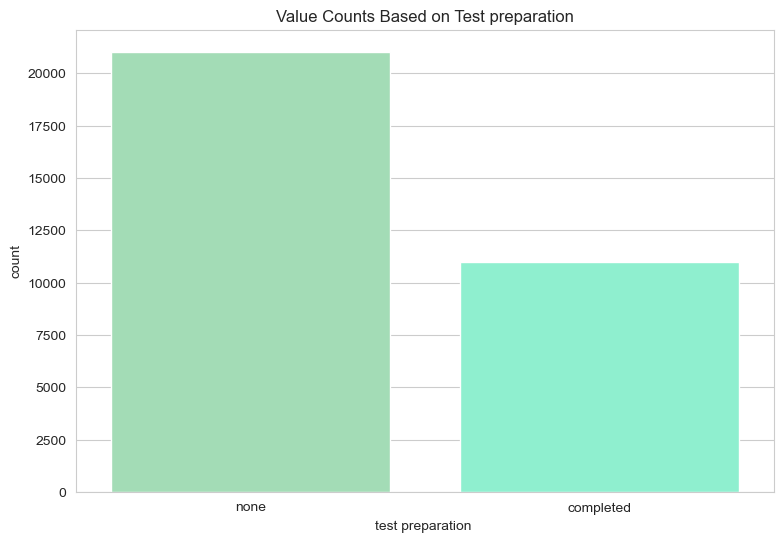

In [38]:
plt.figure(figsize=(9,6))
plt.title('Value Counts Based on Test preparation')
sns.countplot(x=df['test preparation '],palette=custom_palette)

In [39]:
testgrp=df.groupby('test preparation ').agg('mean')

In [40]:
testgrp

,practical score,viva score,exam score,Average Score
test preparation,,,,
completed,67.737236,70.435722,69.274435,69.149131
none,67.893395,70.343588,69.069279,69.102087


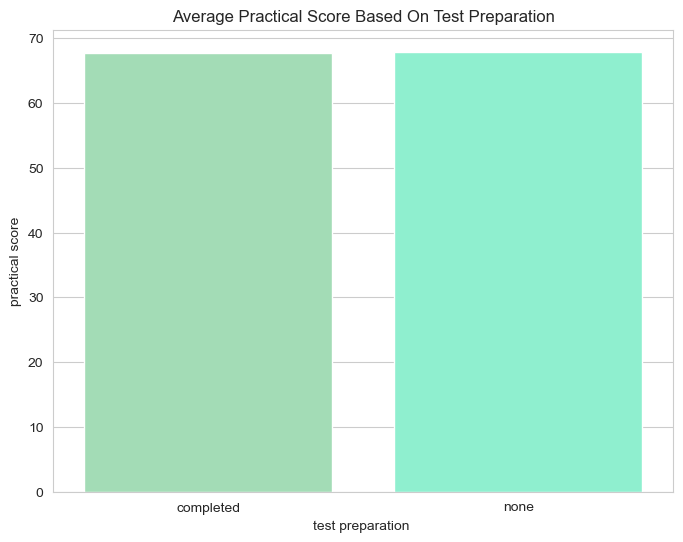

In [41]:
plt.figure(figsize=(8,6))
plt.title('Average Practical Score Based On Test Preparation')
sns.barplot(x=testgrp.index,y='practical score',data=testgrp,palette=custom_palette)
plt.show()

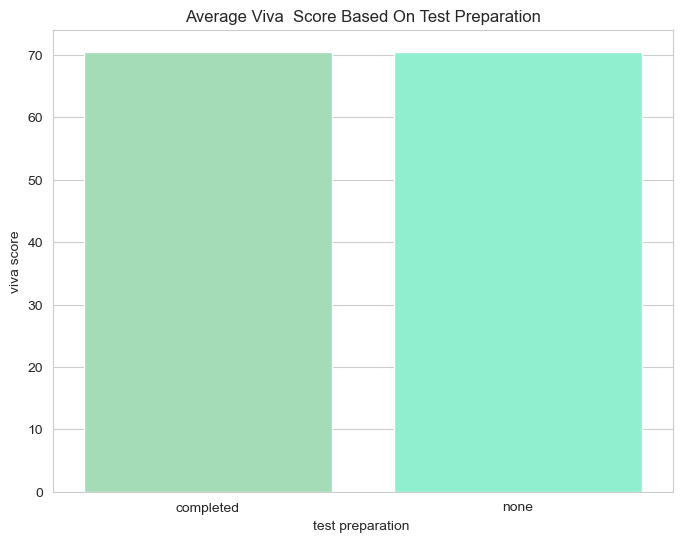

In [42]:
plt.figure(figsize=(8,6))
plt.title('Average Viva  Score Based On Test Preparation')
sns.barplot(x=testgrp.index,y='viva score',data=testgrp,palette=custom_palette)
plt.show()

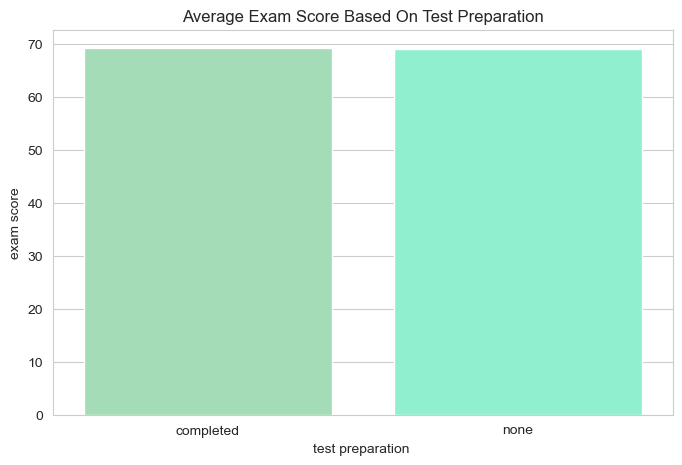

In [43]:
plt.figure(figsize=(8,5))
plt.title('Average Exam Score Based On Test Preparation')
sns.barplot(x=testgrp.index,y='exam score',data=testgrp,palette=custom_palette)
plt.show()

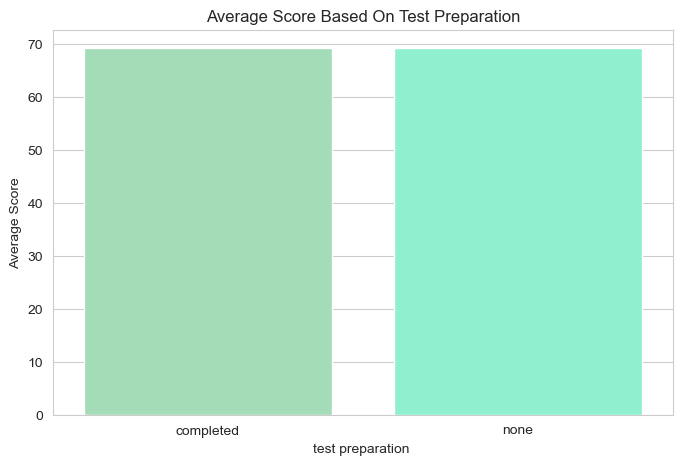

In [44]:
plt.figure(figsize=(8,5))
plt.title('Average Score Based On Test Preparation')
sns.barplot(x=testgrp.index,y='Average Score',data=testgrp,palette=custom_palette)
plt.show()

### parental level of education

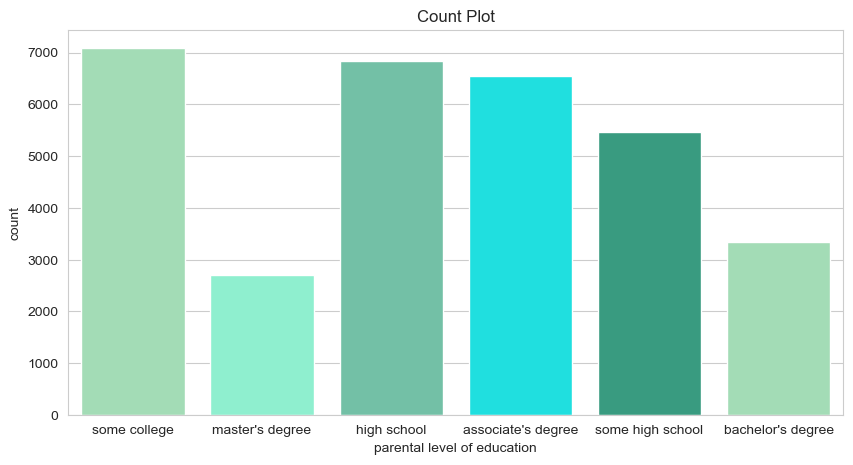

In [45]:
plt.figure(figsize=(10,5))
plt.title('Count Plot')
sns.countplot(x='parental level of education',data=df,palette=custom_palette)
plt.show()

In [46]:
pargrp=df.groupby('parental level of education').agg('mean')
pargrp

,practical score,viva score,exam score,Average Score
parental level of education,,,,
associate's degree,68.002898,70.309335,69.383923,69.232052
bachelor's degree,68.152350,70.473511,69.226579,69.284146
high school,67.843329,70.793593,69.205822,69.280915
master's degree,67.748156,70.141593,68.851770,68.913840
some college,67.553155,70.285896,69.150501,68.996517
some high school,67.866021,70.102541,68.839517,68.936026


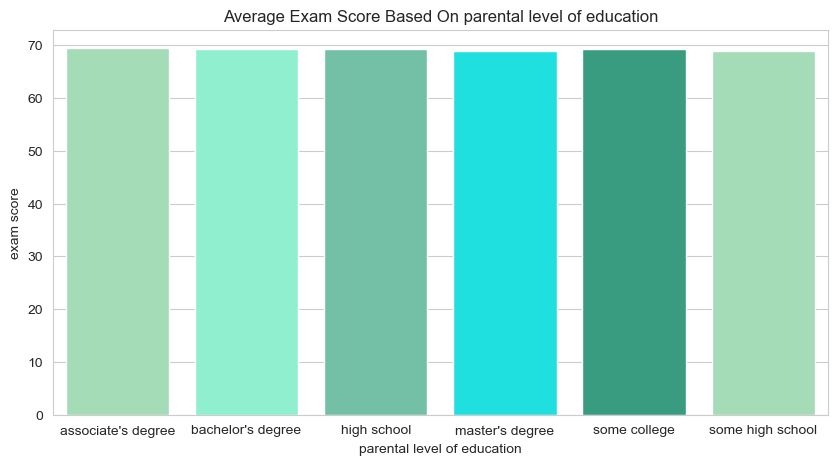

In [47]:
plt.figure(figsize=(10,5))
plt.title('Average Exam Score Based On parental level of education')
sns.barplot(x=pargrp.index,y='exam score',data=pargrp,palette=custom_palette)
plt.show()

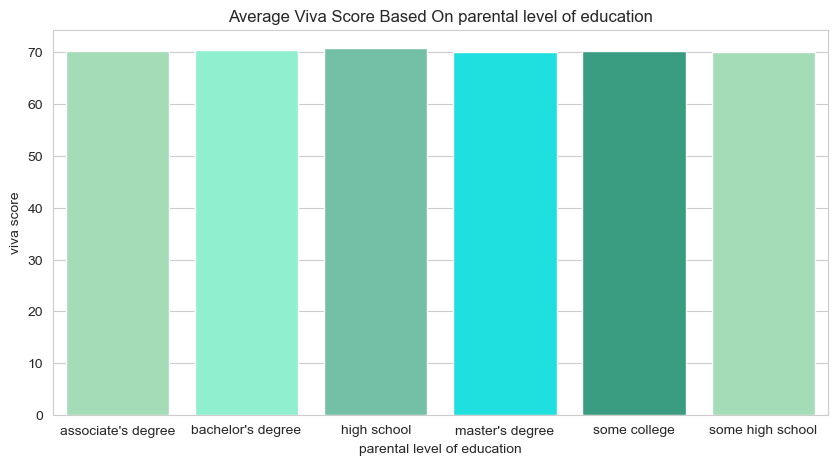

In [48]:
plt.figure(figsize=(10,5))
plt.title('Average Viva Score Based On parental level of education')
sns.barplot(x=pargrp.index,y='viva score',data=pargrp,palette=custom_palette)
plt.show()

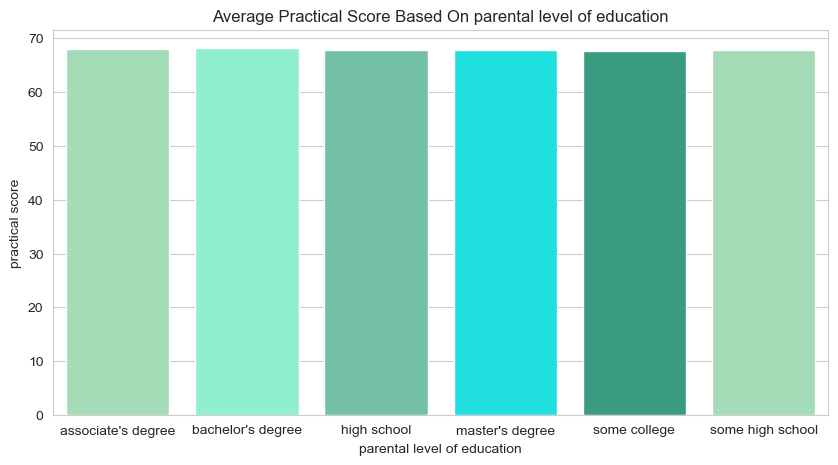

In [49]:
plt.figure(figsize=(10,5))
plt.title('Average Practical Score Based On parental level of education')
sns.barplot(x=pargrp.index,y='practical score',data=pargrp,palette=custom_palette)
plt.show()

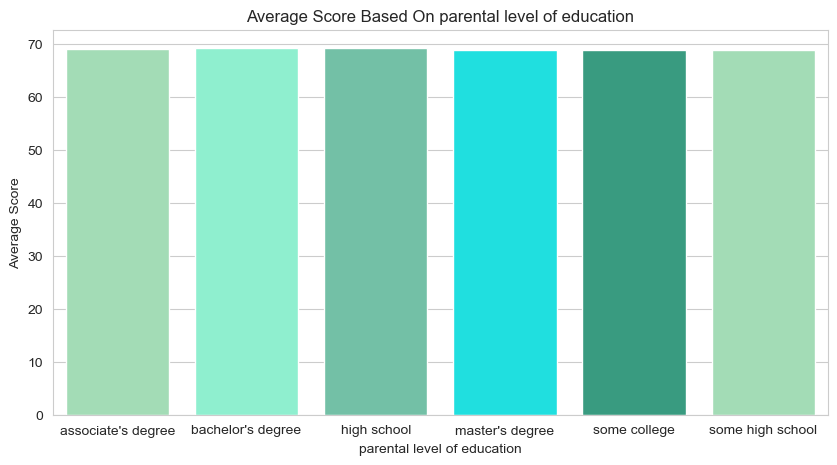

In [50]:
plt.figure(figsize=(10,5))
plt.title('Average Score Based On parental level of education')
sns.barplot(x=pargrp.index,y='Average Score',data=pargrp,palette=custom_palette)
plt.show()

### Lunch

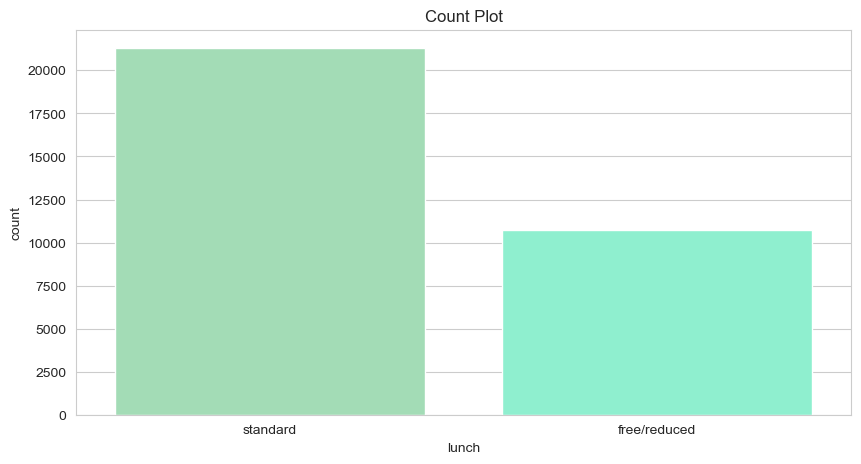

In [51]:
plt.figure(figsize=(10,5))
plt.title('Count Plot')
sns.countplot(x='lunch',data=df,palette=custom_palette)
plt.show()

In [52]:
lugrp=df.groupby('lunch').agg('mean')
lugrp

,practical score,viva score,exam score,Average Score
lunch,,,,
free/reduced,67.421844,69.934131,68.845090,68.733688
standard,68.049962,70.596826,69.287613,69.311467


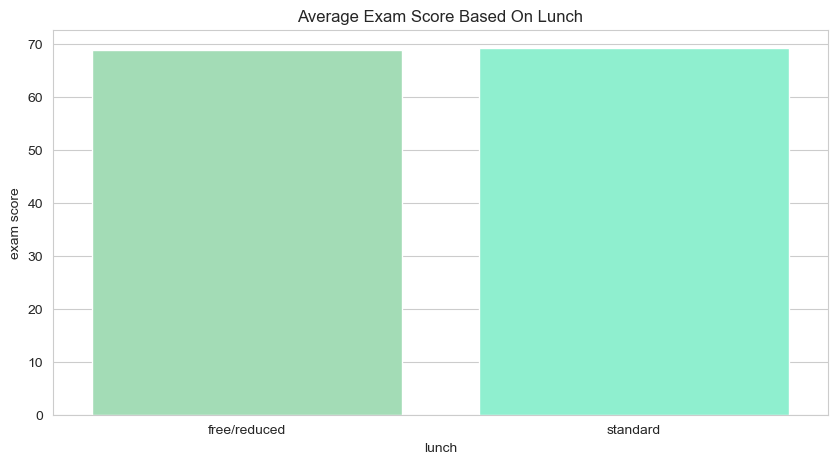

In [53]:
plt.figure(figsize=(10,5))
plt.title('Average Exam Score Based On Lunch')
sns.barplot(x=lugrp.index,y='exam score',data=lugrp,palette=custom_palette)
plt.show()

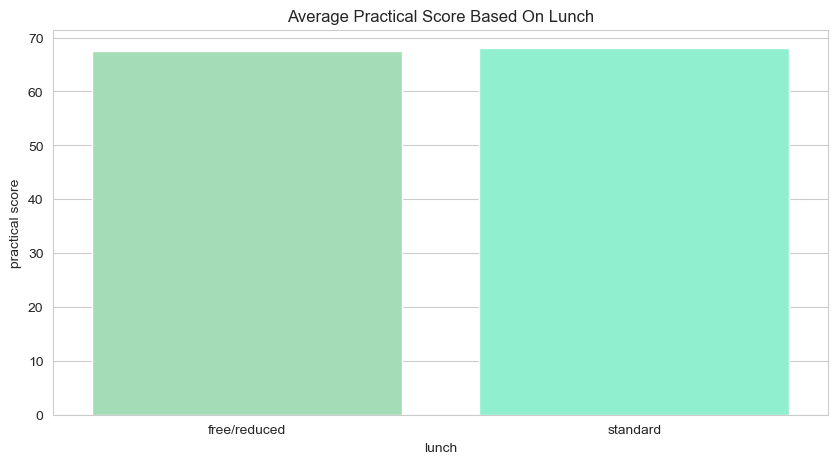

In [54]:
plt.figure(figsize=(10,5))
plt.title('Average Practical Score Based On Lunch')
sns.barplot(x=lugrp.index,y='practical score',data=lugrp,palette=custom_palette)
plt.show()

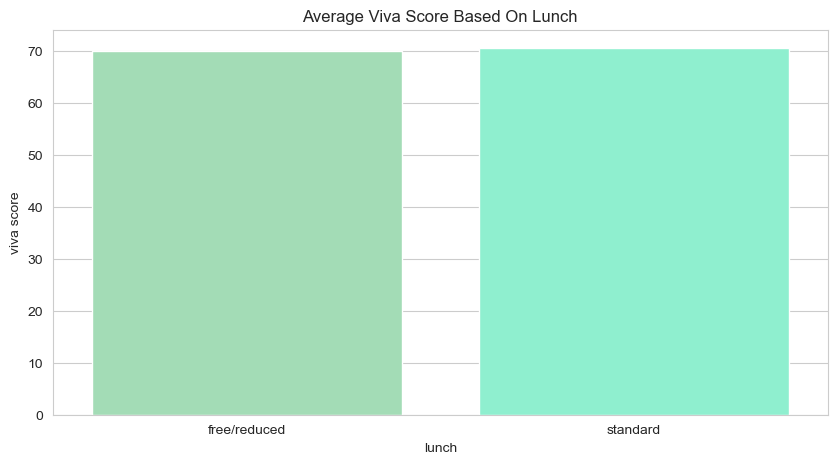

In [55]:
plt.figure(figsize=(10,5))
plt.title('Average Viva Score Based On Lunch')
sns.barplot(x=lugrp.index,y='viva score',data=lugrp,palette=custom_palette)
plt.show()

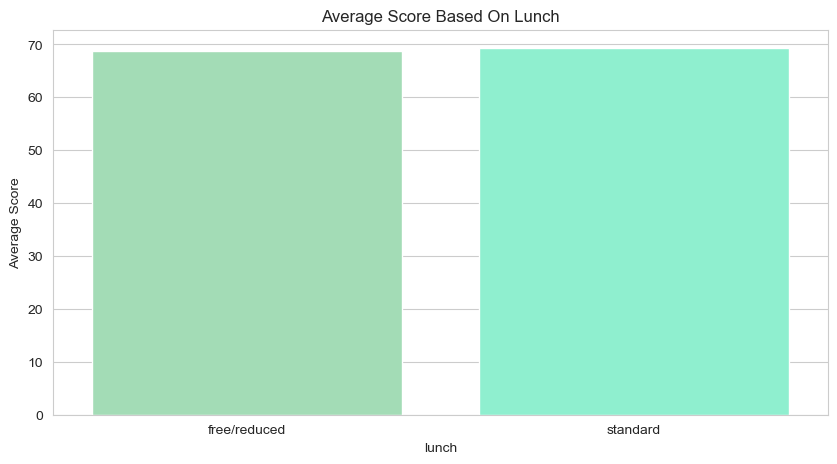

In [56]:

plt.figure(figsize=(10,5))
plt.title('Average Score Based On Lunch')
sns.barplot(x=lugrp.index,y='Average Score',data=lugrp,palette=custom_palette)
plt.show()

### Section

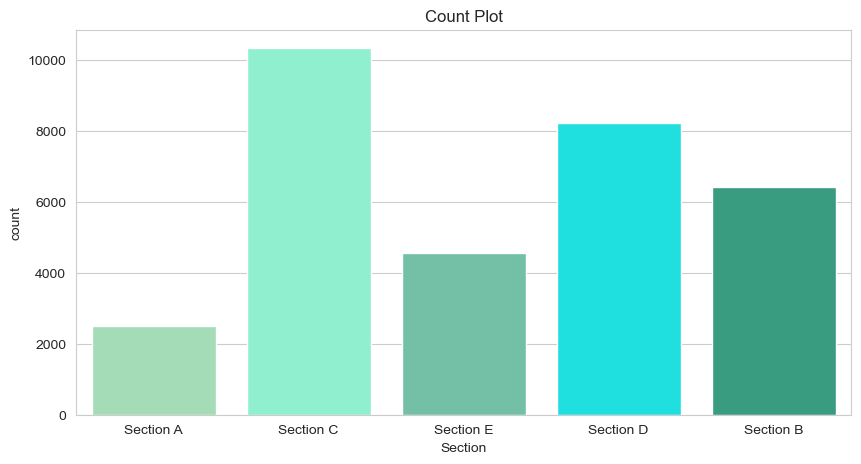

In [57]:
plt.figure(figsize=(10,5))
plt.title('Count Plot')
sns.countplot(x='Section',data=df,palette=custom_palette)
plt.show()

In [58]:
segrp=df.groupby('Section').agg('mean')
segrp

,practical score,viva score,exam score,Average Score
Section,,,,
Section A,67.234094,69.761104,69.464986,68.820061
Section B,67.914170,70.461454,68.772316,69.049313
Section C,67.759372,70.420324,69.183861,69.121186
Section D,67.849160,70.267835,69.265522,69.127506
Section E,68.233370,70.681888,69.150384,69.355214


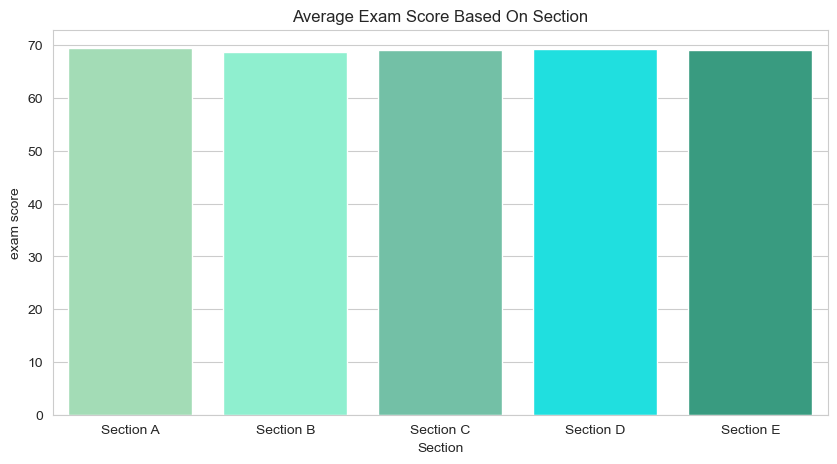

In [59]:
plt.figure(figsize=(10,5))
plt.title('Average Exam Score Based On Section')
sns.barplot(x=segrp.index,y='exam score',data=segrp,palette=custom_palette)
plt.show()

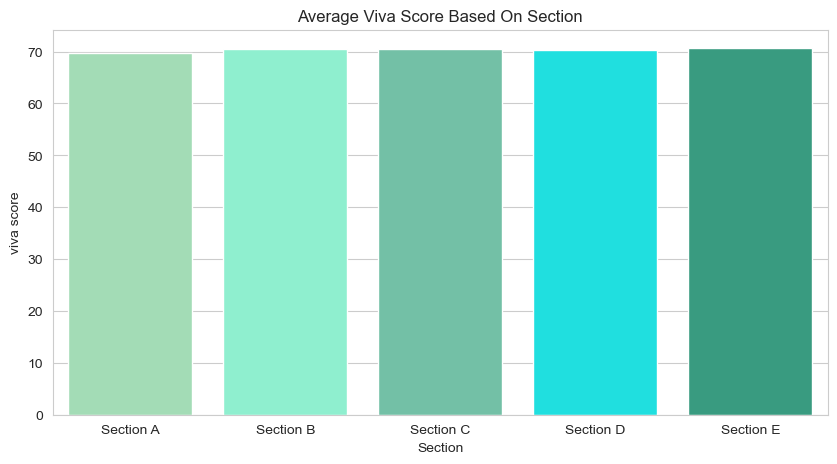

In [60]:
plt.figure(figsize=(10,5))
plt.title('Average Viva Score Based On Section')
sns.barplot(x=segrp.index,y='viva score',data=segrp,palette=custom_palette)
plt.show()

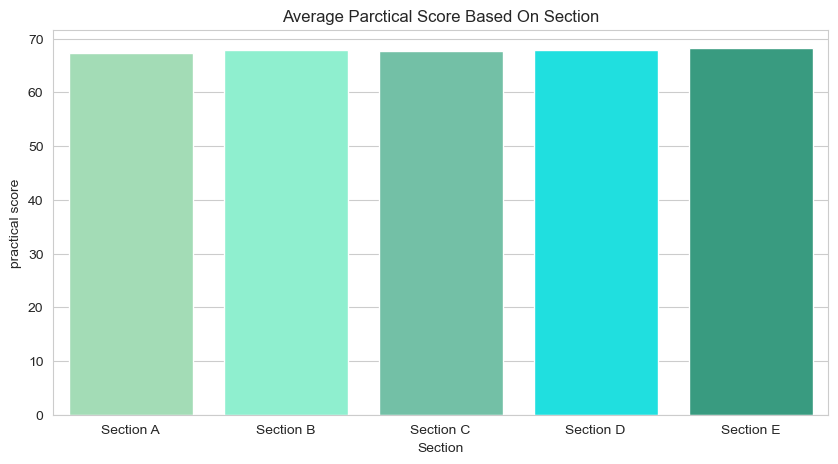

In [61]:
plt.figure(figsize=(10,5))
plt.title('Average Parctical Score Based On Section')
sns.barplot(x=segrp.index,y='practical score',data=segrp,palette=custom_palette)
plt.show()

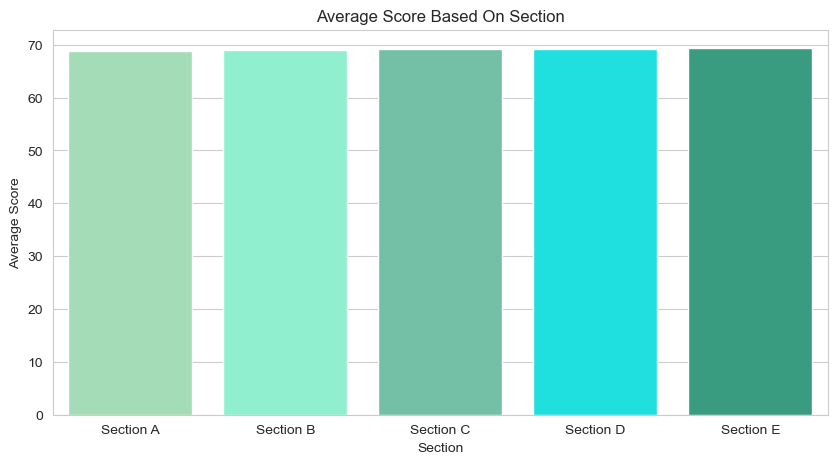

In [62]:
plt.figure(figsize=(10,5))
plt.title('Average Score Based On Section')
sns.barplot(x=segrp.index,y='Average Score',data=segrp,palette=custom_palette)
plt.show()

### Gender -Test Preparation

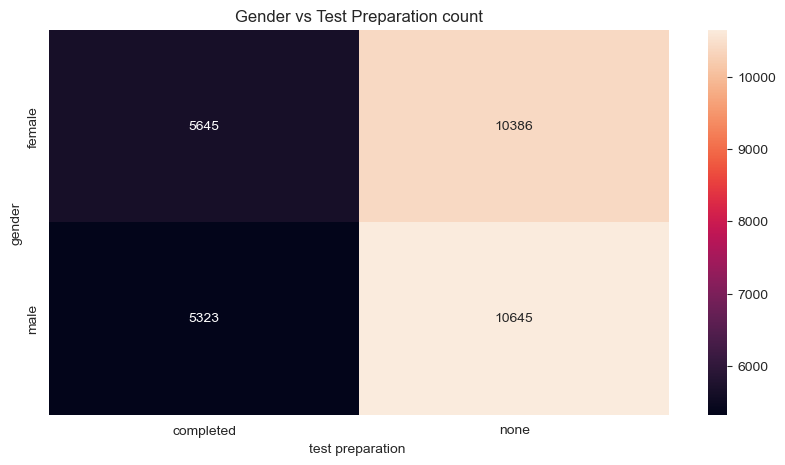

In [63]:
plt.figure(figsize=(10,5))
plt.title('Gender vs Test Preparation count')
sns.heatmap(pd.crosstab(index=df['gender'],columns=df['test preparation ']),annot=True,fmt='d')
plt.show()

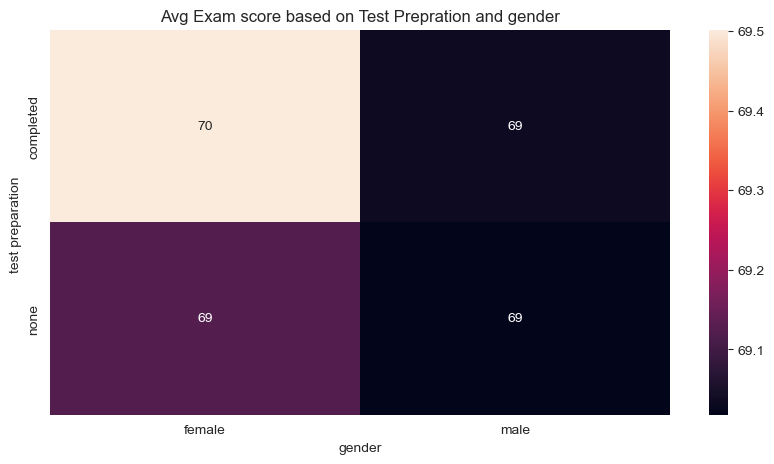

In [64]:
plt.figure(figsize=(10,5))
plt.title('Avg Exam score based on Test Prepration and gender')
sns.heatmap(df.pivot_table(columns='gender',index='test preparation ',values='exam score'),annot=True)
plt.show()

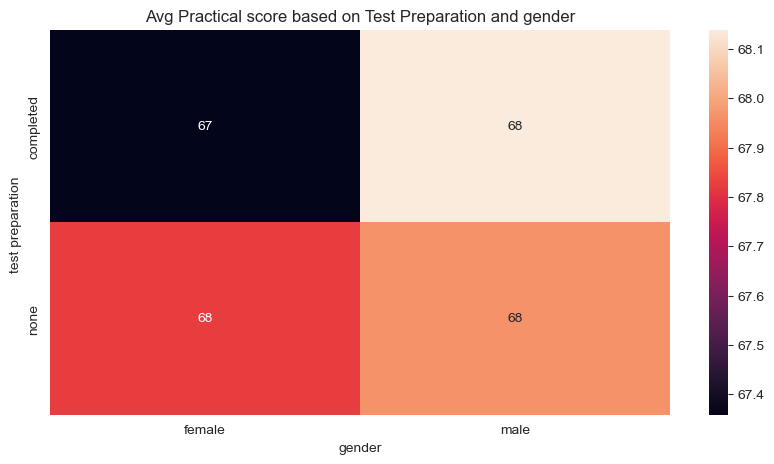

In [65]:
plt.figure(figsize=(10,5))
plt.title('Avg Practical score based on Test Preparation and gender')
sns.heatmap(df.pivot_table(columns='gender',index='test preparation ',values='practical score'),annot=True)
plt.show()

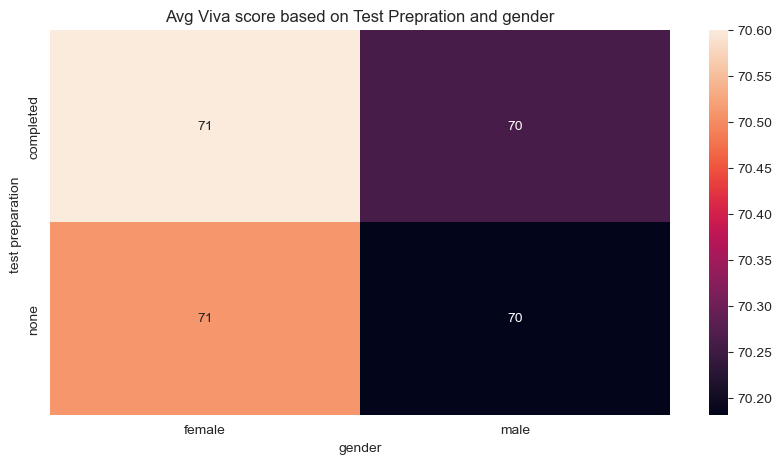

In [66]:
plt.figure(figsize=(10,5))
plt.title('Avg Viva score based on Test Prepration and gender')
sns.heatmap(df.pivot_table(columns='gender',index='test preparation ',values='viva score'),annot=True)
plt.show()

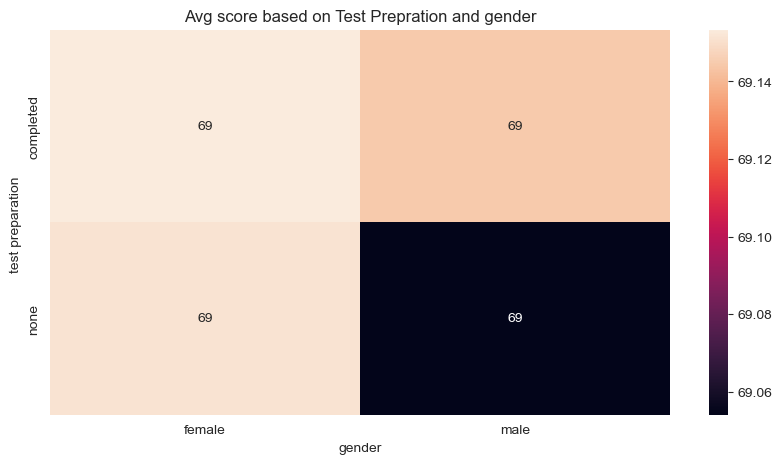

In [67]:
plt.figure(figsize=(10,5))
plt.title('Avg score based on Test Prepration and gender')
sns.heatmap(df.pivot_table(columns='gender',index='test preparation ',values='Average Score'),annot=True)
plt.show()

### Gender-Parental level of education

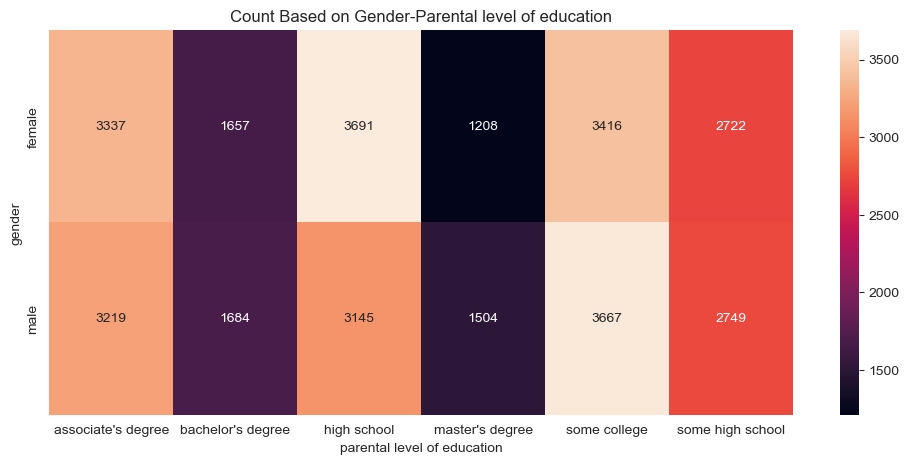

In [68]:
plt.figure(figsize=(12,5))
plt.title('Count Based on Gender-Parental level of education')
sns.heatmap(pd.crosstab(index=df['gender'],columns=df['parental level of education']),annot=True,fmt='d')
plt.show()

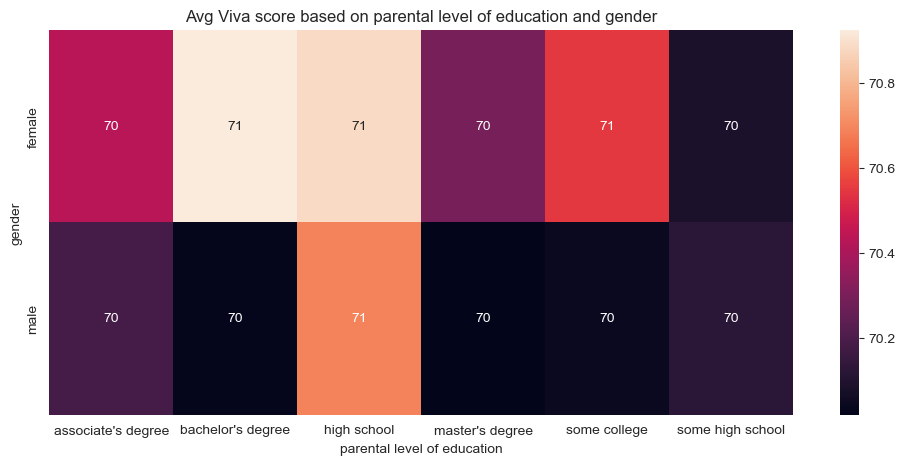

In [69]:
plt.figure(figsize=(12,5))
plt.title('Avg Viva score based on parental level of education and gender')
sns.heatmap(df.pivot_table(index='gender',columns='parental level of education',values='viva score'),annot=True)
plt.show()

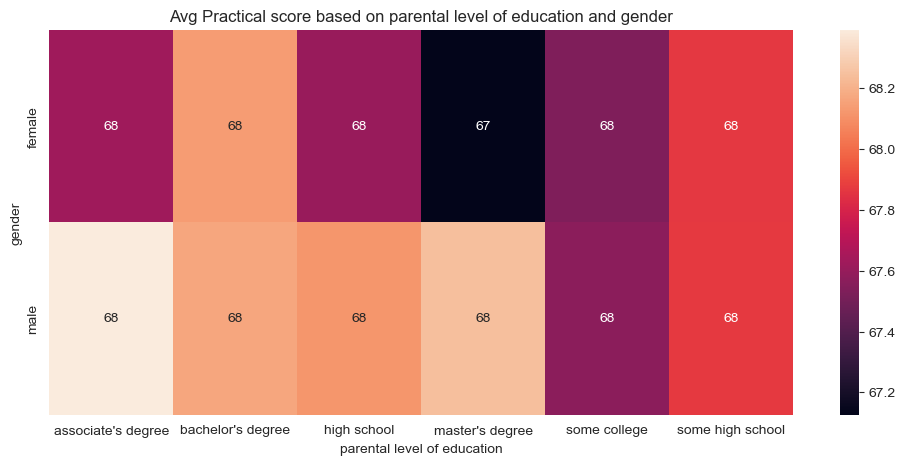

In [70]:
plt.figure(figsize=(12,5))
plt.title('Avg Practical score based on parental level of education and gender')
sns.heatmap(df.pivot_table(index='gender',columns='parental level of education',values='practical score'),annot=True)
plt.show()

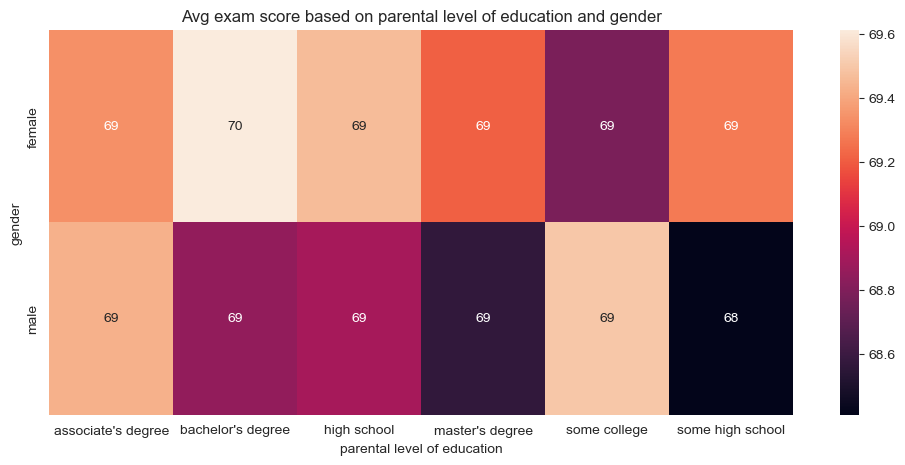

In [71]:
plt.figure(figsize=(12,5))
plt.title('Avg exam score based on parental level of education and gender')
sns.heatmap(df.pivot_table(index='gender',columns='parental level of education',values='exam score'),annot=True)
plt.show()

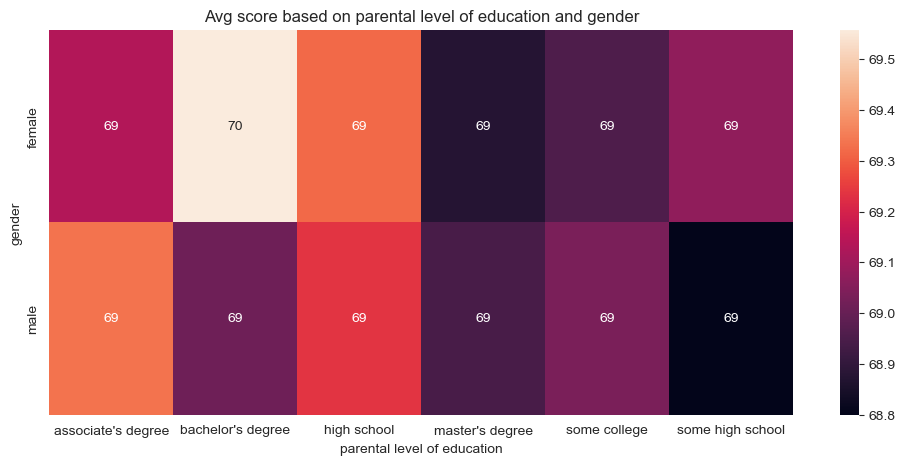

In [72]:
plt.figure(figsize=(12,5))
plt.title('Avg score based on parental level of education and gender')
sns.heatmap(df.pivot_table(index='gender',columns='parental level of education',values='Average Score'),annot=True)
plt.show()

### Test Preparation-Parental level of education

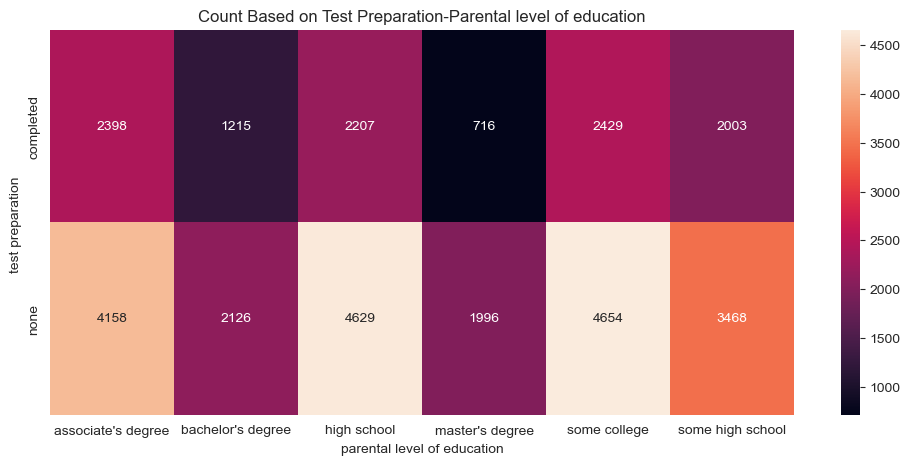

In [73]:
plt.figure(figsize=(12,5))
plt.title('Count Based on Test Preparation-Parental level of education')
sns.heatmap(pd.crosstab(index=df['test preparation '],columns=df['parental level of education']),annot=True,fmt='d')
plt.show()

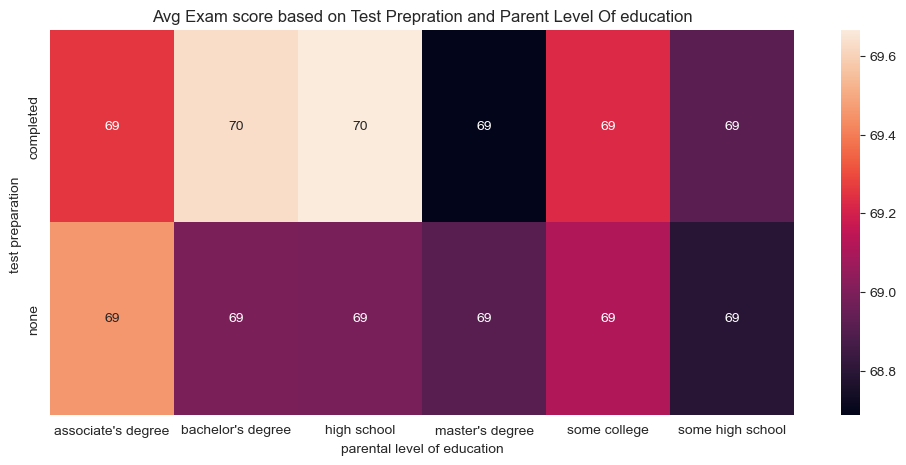

In [74]:
plt.figure(figsize=(12,5))
plt.title('Avg Exam score based on Test Prepration and Parent Level Of education')
sns.heatmap(df.pivot_table(index='test preparation ',columns='parental level of education',values='exam score'),annot=True)
plt.show()

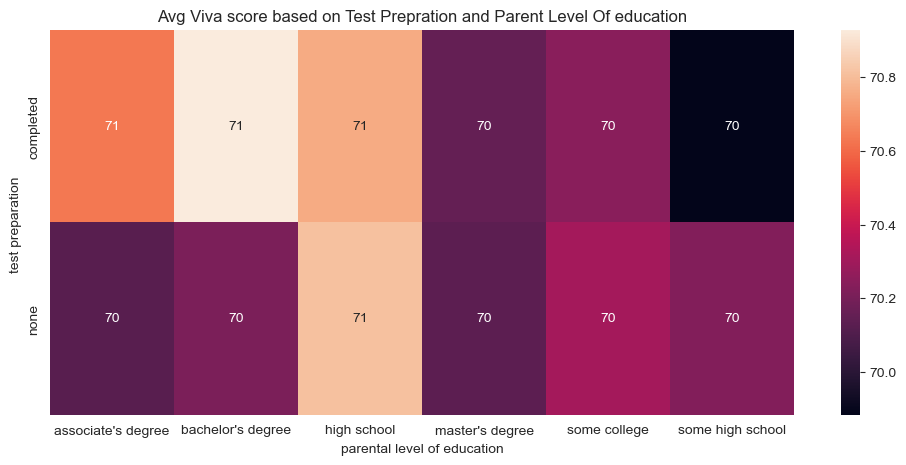

In [75]:
plt.figure(figsize=(12,5))
plt.title('Avg Viva score based on Test Prepration and Parent Level Of education')
sns.heatmap(df.pivot_table(index='test preparation ',columns='parental level of education',values='viva score'),annot=True)
plt.show()

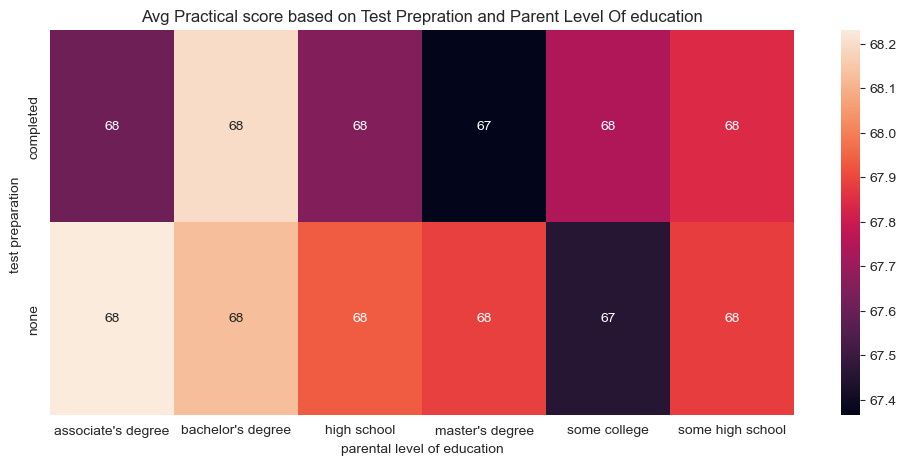

In [76]:
plt.figure(figsize=(12,5))
plt.title('Avg Practical score based on Test Prepration and Parent Level Of education')
sns.heatmap(df.pivot_table(index='test preparation ',columns='parental level of education',values='practical score'),annot=True)
plt.show()

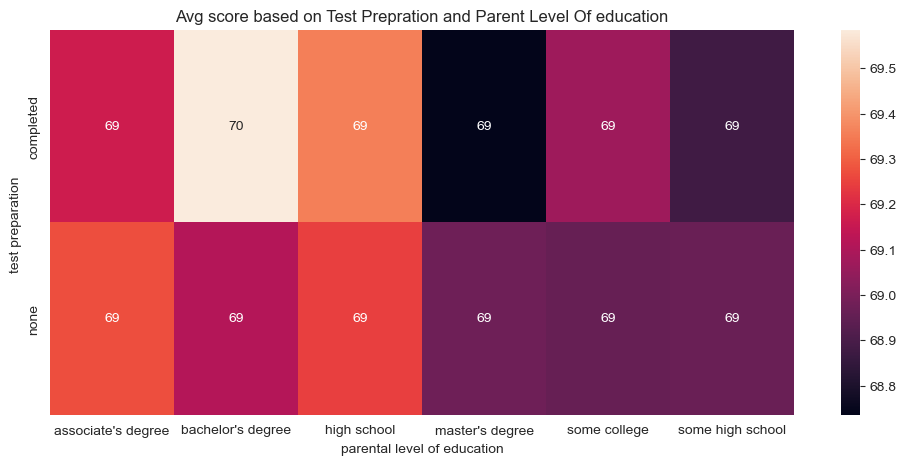

In [77]:
plt.figure(figsize=(12,5))
plt.title('Avg score based on Test Prepration and Parent Level Of education')
sns.heatmap(df.pivot_table(index='test preparation ',columns='parental level of education',values='Average Score'),annot=True)
plt.show()

### Gender - Section

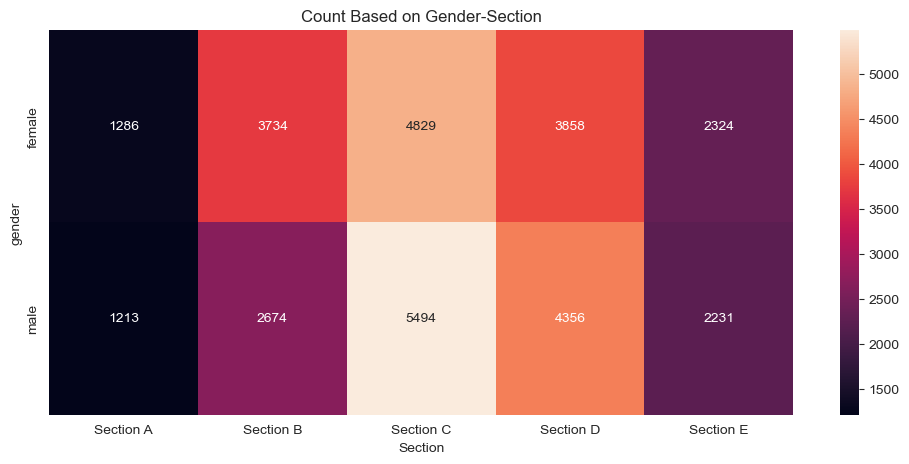

In [78]:
plt.figure(figsize=(12,5))
plt.title('Count Based on Gender-Section')
sns.heatmap(pd.crosstab(index=df['gender'],columns=df['Section']),annot=True,fmt='d')
plt.show()

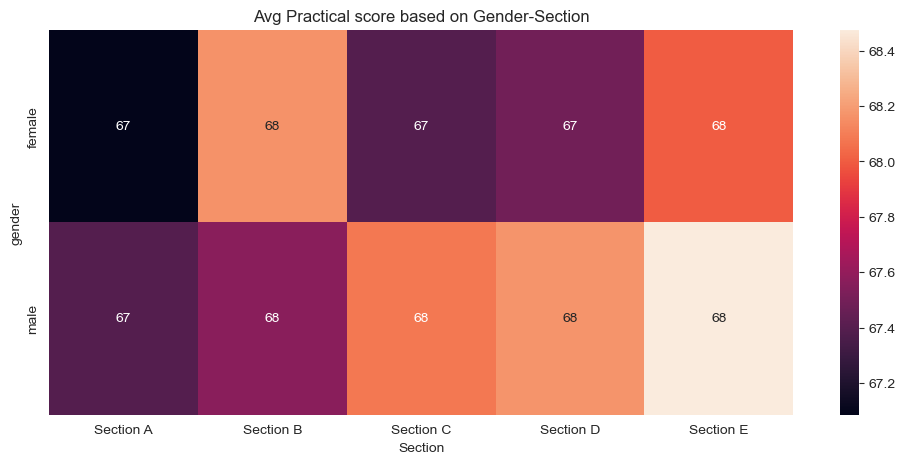

In [79]:
plt.figure(figsize=(12,5))
plt.title('Avg Practical score based on Gender-Section')
sns.heatmap(df.pivot_table(index='gender',columns='Section',values='practical score'),annot=True)
plt.show()

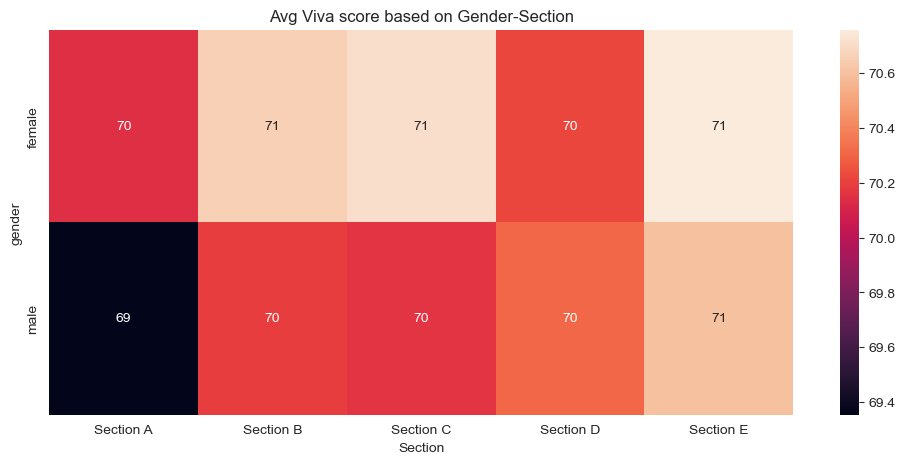

In [80]:
plt.figure(figsize=(12,5))
plt.title('Avg Viva score based on Gender-Section')
sns.heatmap(df.pivot_table(index='gender',columns='Section',values='viva score'),annot=True)
plt.show()

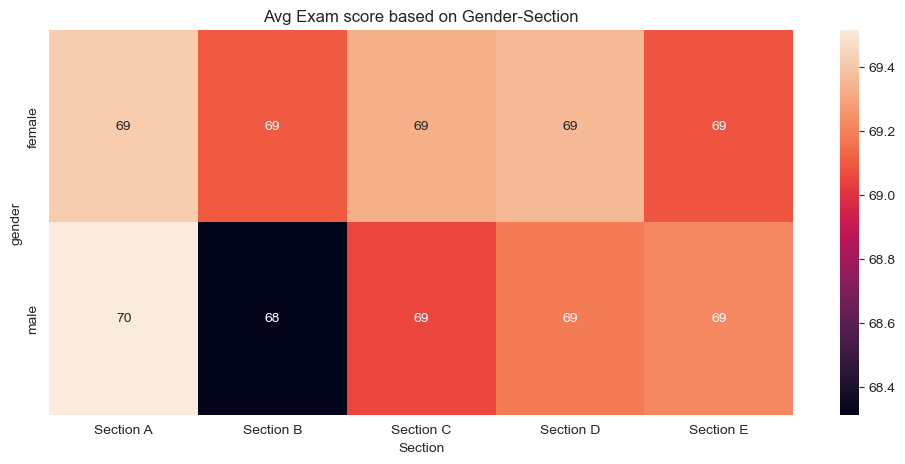

In [81]:
plt.figure(figsize=(12,5))
plt.title('Avg Exam score based on Gender-Section')
sns.heatmap(df.pivot_table(index='gender',columns='Section',values='exam score'),annot=True)
plt.show()

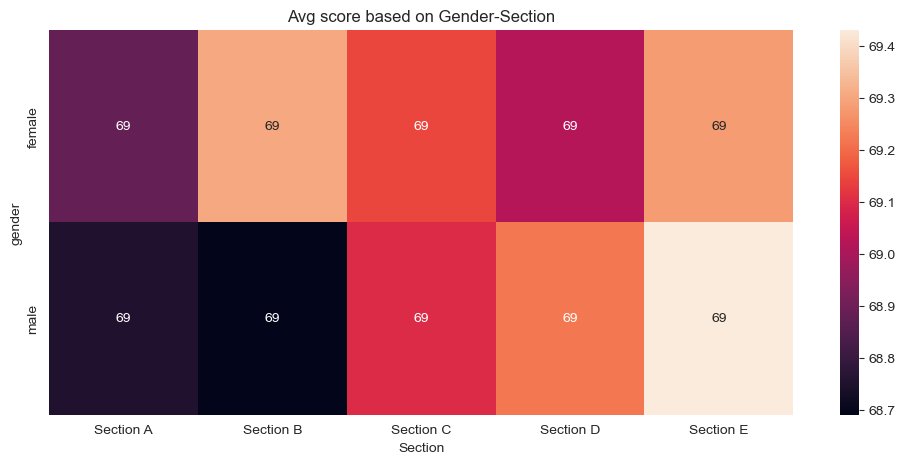

In [82]:
plt.figure(figsize=(12,5))
plt.title('Avg score based on Gender-Section')
sns.heatmap(df.pivot_table(index='gender',columns='Section',values='Average Score'),annot=True)
plt.show()

### Test Preparation - Section

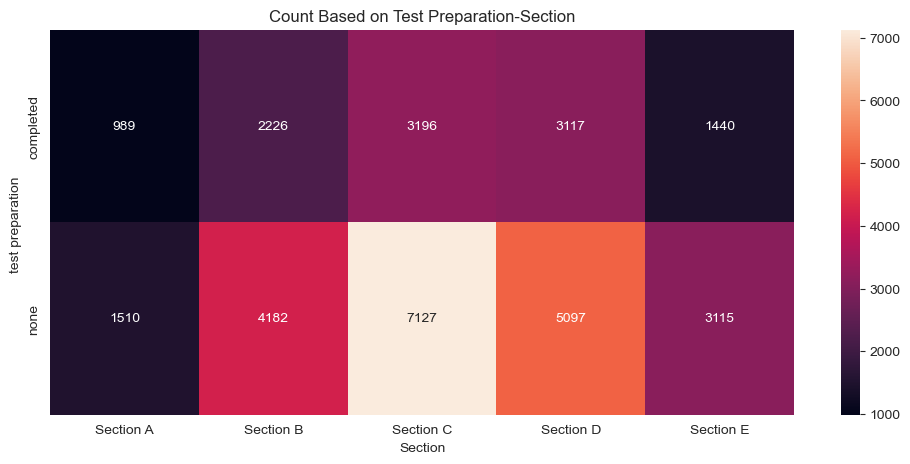

In [83]:
plt.figure(figsize=(12,5))
plt.title('Count Based on Test Preparation-Section')
sns.heatmap(pd.crosstab(index=df['test preparation '],columns=df['Section']),annot=True,fmt='d')
plt.show()

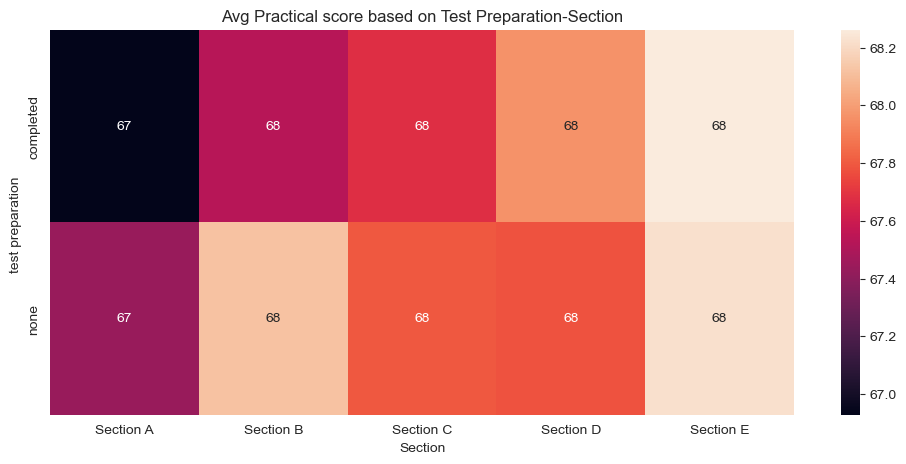

In [84]:
plt.figure(figsize=(12,5))
plt.title('Avg Practical score based on Test Preparation-Section')
sns.heatmap(df.pivot_table(index='test preparation ',columns='Section',values='practical score'),annot=True)
plt.show()

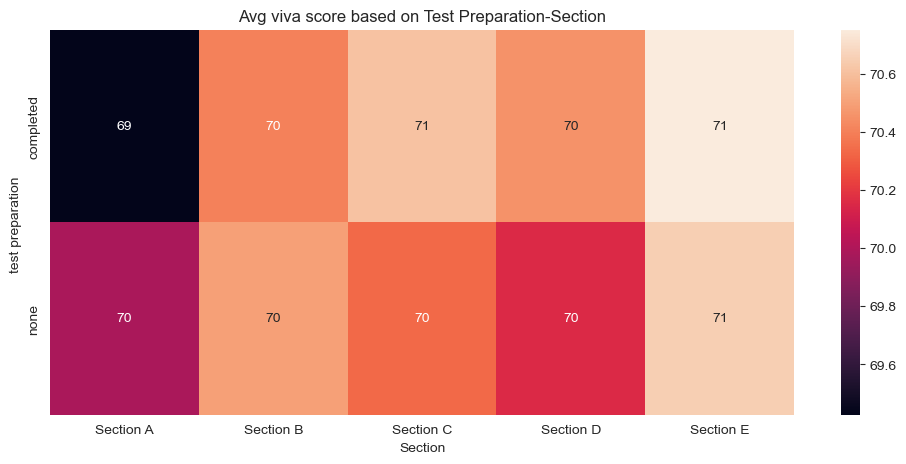

In [85]:
plt.figure(figsize=(12,5))
plt.title('Avg viva score based on Test Preparation-Section')
sns.heatmap(df.pivot_table(index='test preparation ',columns='Section',values='viva score'),annot=True)
plt.show()

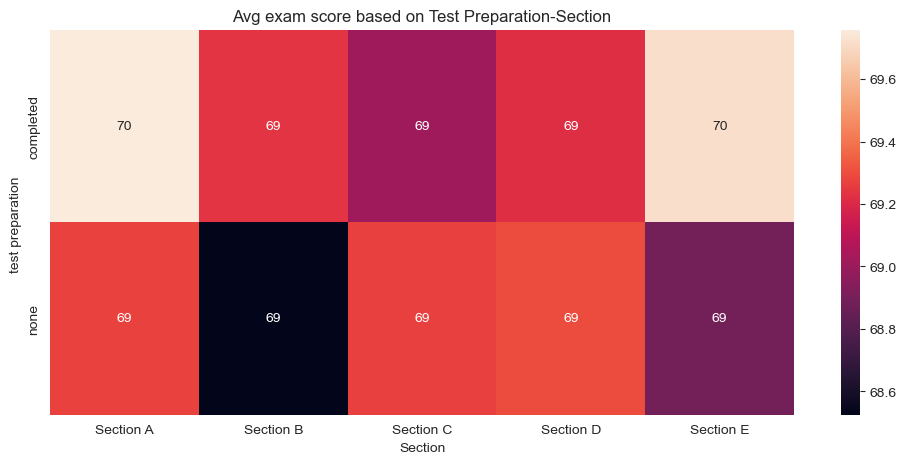

In [86]:
plt.figure(figsize=(12,5))
plt.title('Avg exam score based on Test Preparation-Section')
sns.heatmap(df.pivot_table(index='test preparation ',columns='Section',values='exam score'),annot=True)
plt.show()

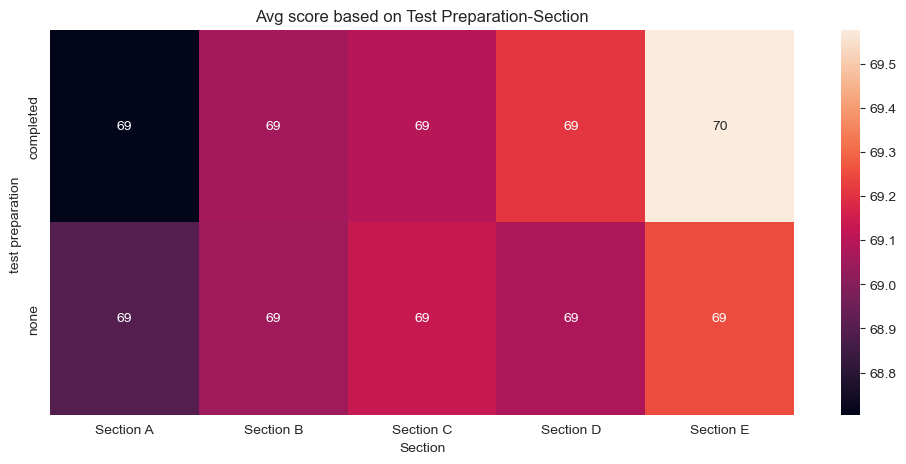

In [87]:
plt.figure(figsize=(12,5))
plt.title('Avg score based on Test Preparation-Section')
sns.heatmap(df.pivot_table(index='test preparation ',columns='Section',values='Average Score'),annot=True)
plt.show()

### Practical Score

<Axes: title={'center': 'Histogram for Practical Score'}>

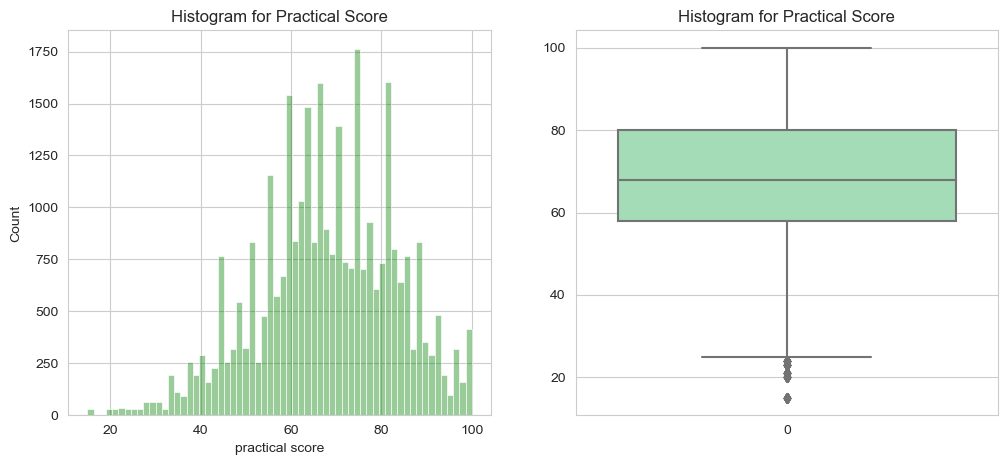

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Histogram for Practical Score')
sns.histplot(df['practical score'],color='g',alpha=0.4)
plt.subplot(122)
plt.title('Histogram for Practical Score')
sns.boxplot(df['practical score'],palette=custom_palette)

### Viva Score

<Axes: title={'center': 'Boxplot for Viva Score'}>

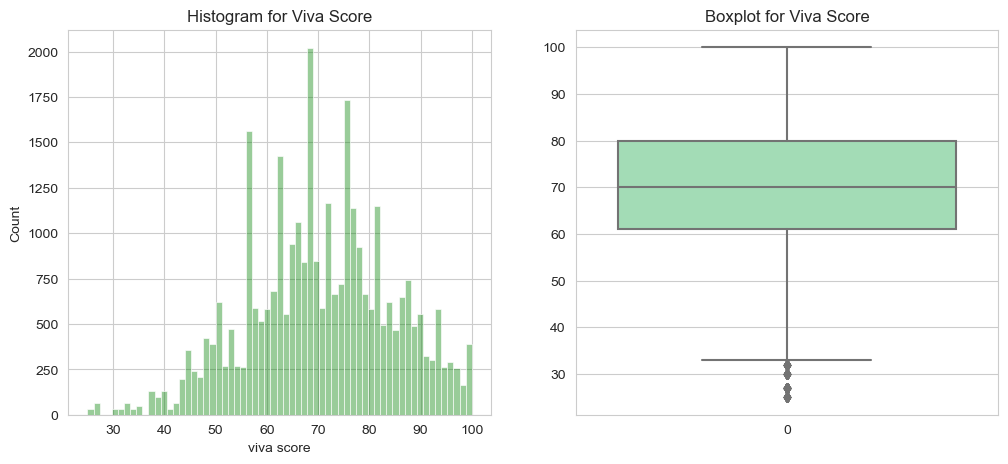

In [89]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Histogram for Viva Score')
sns.histplot(df['viva score'],color='g',alpha=0.4)
plt.subplot(122)
plt.title('Boxplot for Viva Score')
sns.boxplot(df['viva score'],palette=custom_palette)

### Exam Score

<Axes: title={'center': 'Boxplot for Exam Score'}>

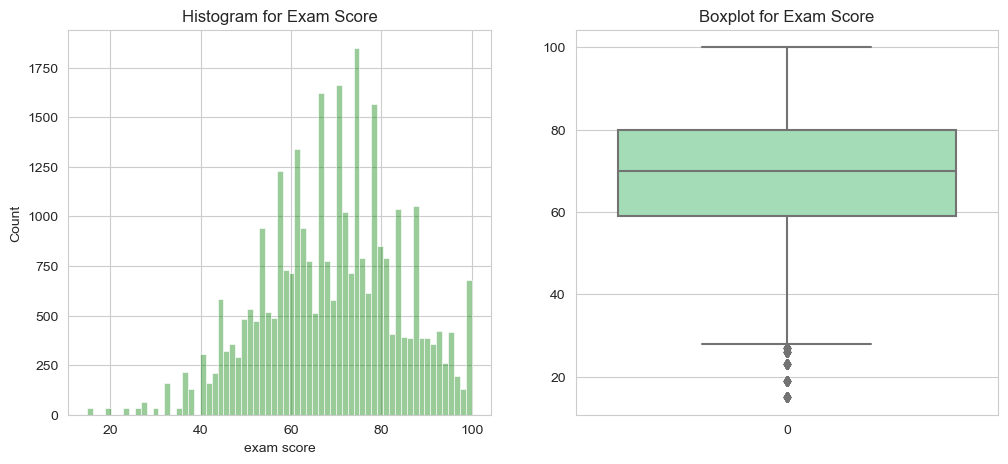

In [90]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Histogram for Exam Score')
sns.histplot(df['exam score'],color='g',alpha=0.4)
plt.subplot(122)
plt.title('Boxplot for Exam Score')
sns.boxplot(df['exam score'],palette=custom_palette)

### Average Score

<Axes: title={'center': 'Boxplot for Average Score'}>

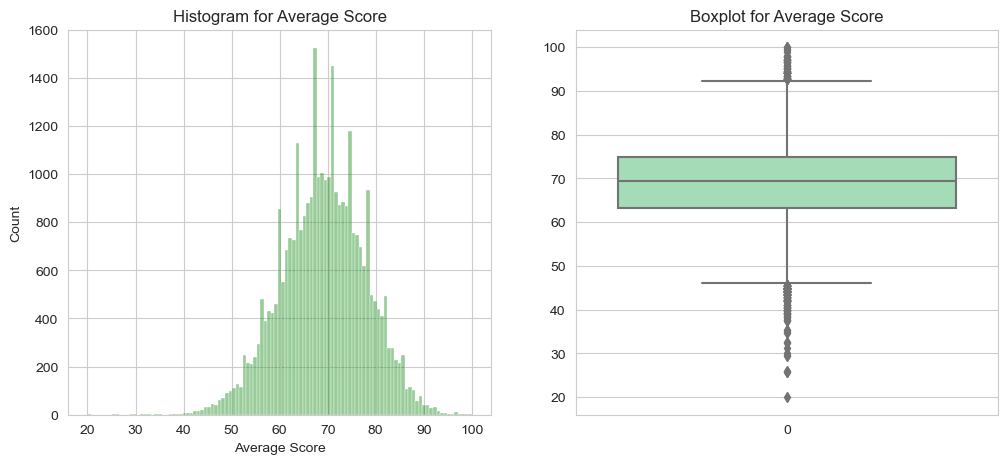

In [91]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Histogram for Average Score')
sns.histplot(df['Average Score'],color='g',alpha=0.4)
plt.subplot(122)
plt.title('Boxplot for Average Score')
sns.boxplot(df['Average Score'],palette=custom_palette)

### Practical Score - Exam score

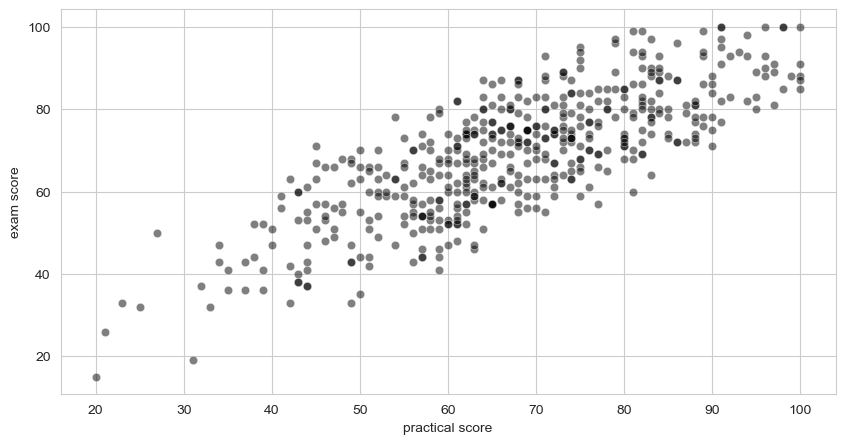

In [92]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='practical score',y='exam score',data=df[:500],color='black',alpha=0.5)
plt.show()

### Viva Score - Exam score

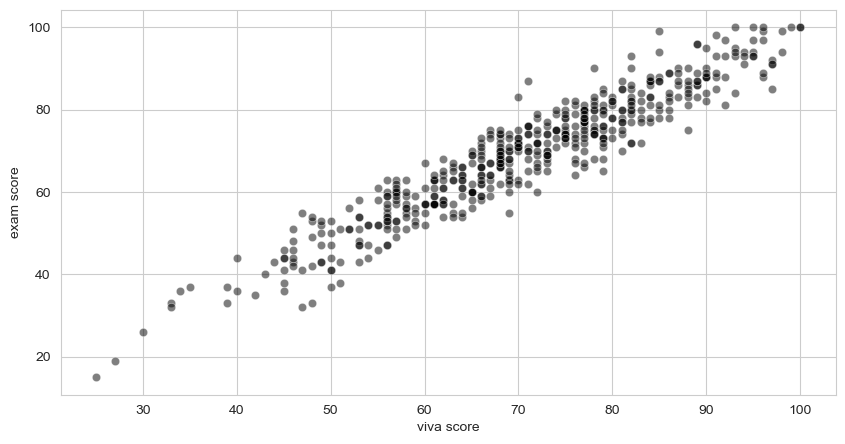

In [93]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='viva score',y='exam score',data=df[:500],color='black',alpha=0.5)
plt.show()

### CONVERTING DATA INTO DISCREET FOR CLASSIFICATION

In [94]:
df['Exam Score']=df['exam score'].map(lambda x:1 if x > 45 else 0)

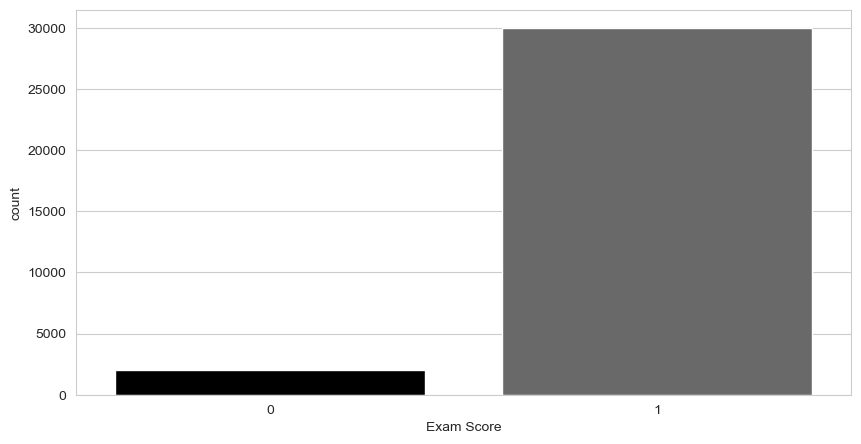

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exam Score',data=df,palette=palette1)
plt.show()

### From this Bar plot we can understand that Our data is highly Imbalanced ,so we need to apply resambling Techinques

In [96]:
df['Exam Score'].value_counts()

1    29976
0     2023
Name: Exam Score, dtype: int64

In [97]:
grp=pd.crosstab(index=df['gender'],columns=df['Exam Score'])
grp

Exam Score,0,1
gender,,
female,1012,15019
male,1011,14957


<Axes: title={'center': 'Gender based Exam Score'}, xlabel='gender'>

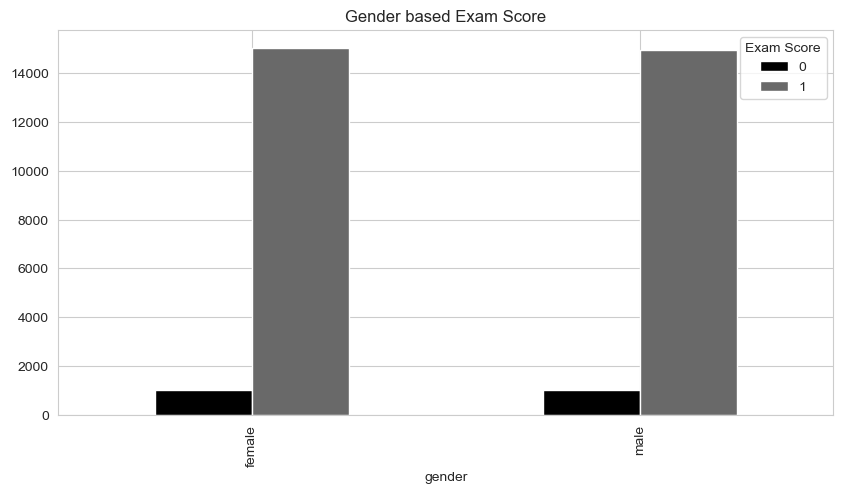

In [98]:
grp.plot(kind='bar',figsize=(10,5),title='Gender based Exam Score',color=palette1)

In [99]:
target=df[['Exam Score']]

In [100]:
target

,Exam Score
0,1
1,1
2,0
3,0
4,1
...,...
31994,1
31995,1
31996,1
31997,1


### Label Encoding

In [101]:
def fun(i):
    i=label.fit_transform(i)
    return i

In [102]:
df[['test preparation ','gender','parental level of education','lunch','Section']]=df[['test preparation ','gender','parental level of education','lunch','Section']].apply(fun)

### Feature Target Splitting

In [103]:
features=df.drop(['exam score','Average Score','Exam Score'],axis=1)
features

,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,1,1,4,1,0,70,73
1,1,1,3,0,2,55,54
2,1,1,3,0,4,56,46
3,1,0,4,0,2,35,47
4,1,0,2,1,2,87,92
...,...,...,...,...,...,...,...
31994,1,1,5,0,4,63,53
31995,1,0,2,1,1,100,80
31996,1,1,1,0,1,62,61
31997,1,1,0,1,3,75,32


In [104]:
features['practical score']=stnd.fit_transform(features[['practical score']])
features['viva score']=stnd.fit_transform(features[['viva score']])

In [105]:
features

,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,1,1,4,1,0,0.141837,0.186257
1,1,1,3,0,2,-0.843083,-1.161974
2,1,1,3,0,4,-0.777422,-1.729650
3,1,0,4,0,2,-2.156310,-1.658690
4,1,0,2,1,2,1.258080,1.534487
...,...,...,...,...,...,...,...
31994,1,1,5,0,4,-0.317792,-1.232933
31995,1,0,2,1,1,2.111677,0.682973
31996,1,1,1,0,1,-0.383454,-0.665257
31997,1,1,0,1,3,0.470144,-2.723083


### Applying SMOTE Because Or Data set is Imbalanced

In [106]:
smote = SMOTE(random_state=42)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=42)

In [108]:
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [109]:
X_train_resampled=X_train_resampled.iloc[:,5:]
X_train_resampled

,practical score,viva score
0,-0.777422,-0.381419
1,1.323741,-0.168541
2,0.601466,-0.878136
3,0.864112,-0.665257
4,0.732789,-1.020055
...,...,...
44927,-1.790161,-1.365153
44928,-0.293449,1.347490
44929,0.178801,-0.903755
44930,-0.218768,0.719029


In [110]:
y_train_resampled

,Exam Score
0,1
1,1
2,1
3,1
4,1
...,...
44927,0
44928,0
44929,0
44930,0


In [117]:
x_test=x_test.iloc[:,5:]
x_test

,practical score,viva score
3874,-0.514776,-0.310460
4034,-0.383454,0.612014
16340,-0.646099,-0.807176
28191,0.141837,0.328176
17581,0.404482,-1.800609
...,...,...
683,-0.186470,-0.878136
26673,1.980355,-0.878136
21163,-1.434035,-0.949095
15010,-2.944246,1.250649


# Model Building

In [111]:
index_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1score',
                'test_accuracy', 'test_precision', 'test_recall', 'test_f1score']
result=pd.DataFrame(index=index_columns)

In [112]:
def model_building(model,model_name,X_train,Y_train,X_test,Y_test):
    '''model,features,model name'''
    
    x_train,x_test,y_train,y_test=X_train,X_test,Y_train,Y_test
    
    model1=model.fit(x_train,y_train)
    train_predict=model1.predict(x_train)
    train_conf=confusion_matrix(y_train,train_predict)
    train_classfi=classification_report(y_train,train_predict)
    train_accuracy=accuracy_score(y_train,train_predict)
    train_precision=precision_score(y_train,train_predict,average='macro')
    train_recall=recall_score(y_train,train_predict,average='macro')
    train_f1score=f1_score(y_train,train_predict,average='macro')
    
    test_predict=model1.predict(x_test)
    test_conf=confusion_matrix(y_test,test_predict)
    test_classfi=classification_report(y_test,test_predict)
    test_accuracy=accuracy_score(y_test,test_predict)
    test_precision=precision_score(y_test,test_predict,average='macro')
    test_recall=recall_score(y_test,test_predict,average='macro')
    test_f1score=f1_score(y_test,test_predict,average='macro')
    
    result[model_name]=train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
    
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title('Test Confusion Matrix')
    sns.heatmap(test_conf,annot=True,fmt='d')
    plt.subplot(122)
    plt.title('Train Confusion Matrix')
    sns.heatmap(train_conf,annot=True,fmt='d')
    plt.show()
    plt.tight_layout()
    print('-'*30,'>','Train Classification Report','<','-'*30)
    print(train_classfi)
    print()
    print('-'*30,'>','Test Classification Report','<','-'*30)
    print(test_classfi)
    

In [113]:
def tuning(model,params):
    '''model,params,features'''
    grid=GridSearchCV(model,params)
    grid.fit(X_train_resampled,y_train_resampled)
    bestp=grid.best_params_
    return bestp

### Decision Tree

In [114]:
params={'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]}
tuning(DecisionTreeClassifier(),params)

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_split': 2}

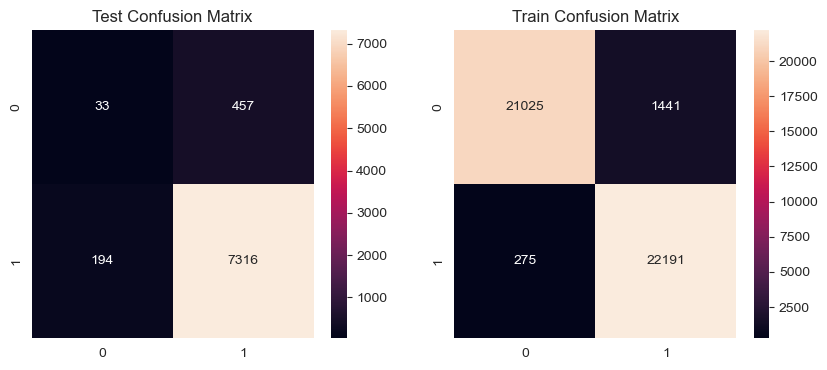

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22466
           1       0.94      0.99      0.96     22466

    accuracy                           0.96     44932
   macro avg       0.96      0.96      0.96     44932
weighted avg       0.96      0.96      0.96     44932


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.15      0.07      0.09       490
           1       0.94      0.97      0.96      7510

    accuracy                           0.92      8000
   macro avg       0.54      0.52      0.52      8000
weighted avg       0.89      0.92      0.90      8000



<Figure size 640x480 with 0 Axes>

In [118]:
model_building(DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_split=2),'Decision Tree',X_train_resampled,y_train_resampled,x_test,y_test)

### RandomForest

In [116]:
#params={'n_estimators':[50,100,150],'max_depth':[2,4,8,10,None],'criterion':['entropy','gini'],'max_features':[0.25,0.35,0.5,0.75,1.0,None,'sqrt','log2'],'min_samples_split':[2,3,4,5,6]}
#tuning(RandomForestClassifier(),params)

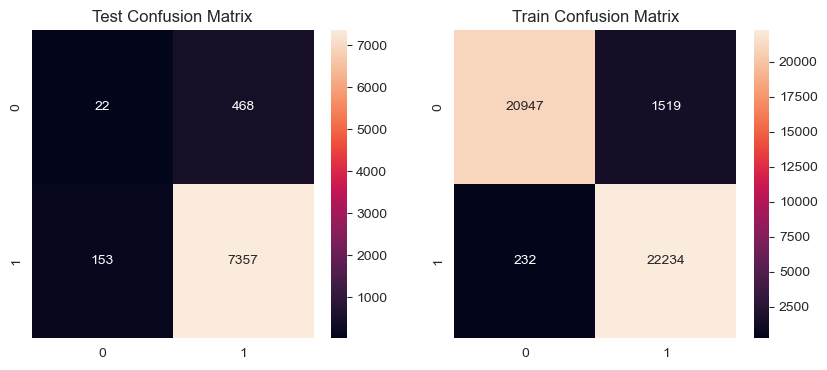

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22466
           1       0.94      0.99      0.96     22466

    accuracy                           0.96     44932
   macro avg       0.96      0.96      0.96     44932
weighted avg       0.96      0.96      0.96     44932


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.13      0.04      0.07       490
           1       0.94      0.98      0.96      7510

    accuracy                           0.92      8000
   macro avg       0.53      0.51      0.51      8000
weighted avg       0.89      0.92      0.90      8000



<Figure size 640x480 with 0 Axes>

In [119]:
model_building(RandomForestClassifier(criterion='gini',max_depth=None,max_features=None,min_samples_split=6,n_estimators=150,class_weight='balanced'),'Random Forest',X_train_resampled,y_train_resampled,x_test,y_test)

### Feature Selection For Random Forest

In [120]:
random=RandomForestClassifier(criterion='gini',max_depth=None,max_features=None,min_samples_split=6,n_estimators=150,class_weight='balanced').fit(X_train_resampled,y_train_resampled)
importance = random.feature_importances_
names=random.feature_names_in_

In [121]:
pd.DataFrame(importance,names)

,0
practical score,0.717652
viva score,0.282348


In [122]:
x_train_selected=X_train_resampled[['practical score','viva score']]
x_test_selected=x_test[['practical score','viva score']]

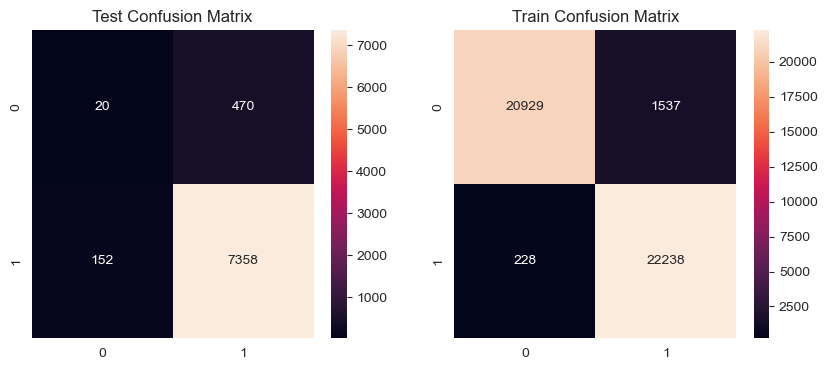

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22466
           1       0.94      0.99      0.96     22466

    accuracy                           0.96     44932
   macro avg       0.96      0.96      0.96     44932
weighted avg       0.96      0.96      0.96     44932


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.12      0.04      0.06       490
           1       0.94      0.98      0.96      7510

    accuracy                           0.92      8000
   macro avg       0.53      0.51      0.51      8000
weighted avg       0.89      0.92      0.90      8000



<Figure size 640x480 with 0 Axes>

In [127]:
model_building(RandomForestClassifier(criterion='gini',max_depth=None,max_features=None,min_samples_split=6,n_estimators=150,class_weight='balanced'),'Random Forest',x_train_selected,y_train_resampled,x_test_selected,y_test)

### XGBOOST

In [124]:
xgbparams={"learning_rate"    : [0.05, 0.15, 0.30] ,
 "max_depth"        : [ 3, 6, 10, 12, 15],
 "min_child_weight" : [ 1, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [ 0.3, 0.5 , 0.7 ],
           'n_estimators':[100,150],
           'subsample': [0.6, 0.8, 1.0]}

In [ ]:
#tuning(XGBClassifier(),xgbparams)

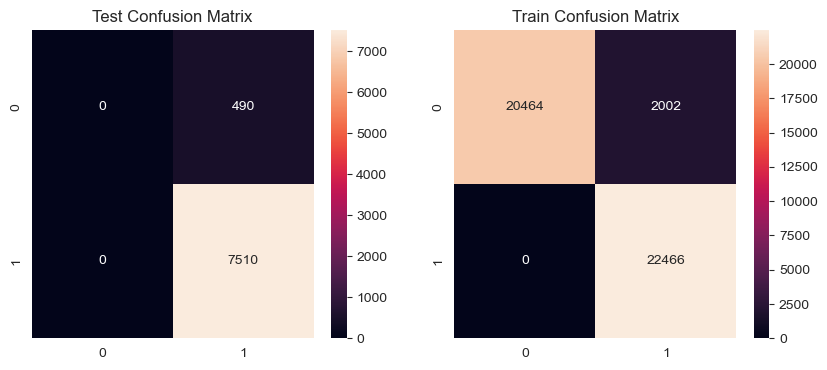

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     22466
           1       0.92      1.00      0.96     22466

    accuracy                           0.96     44932
   macro avg       0.96      0.96      0.96     44932
weighted avg       0.96      0.96      0.96     44932


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       0.94      1.00      0.97      7510

    accuracy                           0.94      8000
   macro avg       0.47      0.50      0.48      8000
weighted avg       0.88      0.94      0.91      8000



<Figure size 640x480 with 0 Axes>

In [125]:
model_building(XGBClassifier(colsample_bytree= 0.7,gamma= 0.0,learning_rate= 0.15,max_depth= 15,min_child_weight= 1,n_estimators= 150,subsample= 1.0),'XGBoost',X_train_resampled,y_train_resampled,x_test,y_test)

In [128]:
result

,Decision Tree,Random Forest,Randomforest Selected,XGBoost
train_accuracy,0.961809,0.960718,0.961809,0.955444
train_precision,0.963056,0.962288,0.963275,0.959089
train_recall,0.961809,0.960718,0.961809,0.955444
train_f1score,0.961783,0.960685,0.961779,0.955355
test_accuracy,0.918625,0.922250,0.920625,0.938750
test_precision,0.543291,0.528119,0.538164,0.469375
test_recall,0.520757,0.510288,0.516100,0.500000
test_f1score,0.524727,0.509935,0.518451,0.484204


## Final Model - Decision Tree

In [130]:
target

,Exam Score
0,1
1,1
2,0
3,0
4,1
...,...
31994,1
31995,1
31996,1
31997,1


In [134]:
features_new

,practical score,viva score
0,0.141837,0.186257
1,-0.843083,-1.161974
2,-0.777422,-1.729650
3,-2.156310,-1.658690
4,1.258080,1.534487
...,...,...
31994,-0.317792,-1.232933
31995,2.111677,0.682973
31996,-0.383454,-0.665257
31997,0.470144,-2.723083


In [139]:
final_model=DecisionTreeClassifier().fit(x_train_selected,y_train_resampled)

In [141]:
test_data=pd.read_csv('test.csv')

In [151]:
test_data

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62
...,...,...,...,...,...,...,...,...
95,EXA32095,none,male,bachelor's degree,standard,Section B,82,84
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
97,EXA32097,none,male,some college,standard,Section C,76,67
98,EXA32098,completed,male,associate's degree,standard,Section A,62,71


In [145]:
test_data1=test_data.iloc[:,6:]

In [146]:
test_data1

,practical score,viva score
0,74,89
1,66,75
2,52,55
3,69,85
4,46,62
...,...,...
95,82,84
96,70,58
97,76,67
98,62,71


In [148]:
predticted=final_model.predict(test_data1)

In [150]:
predticted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [154]:
test_result=pd.DataFrame(columns=['Roll no','Predicted Score'])

In [155]:
test_result['Roll no']=test_data['Roll no']

In [156]:
test_result['Predicted Score']=predticted

In [157]:
test_result

,Roll no,Predicted Score
0,EXA32000,1
1,EXA32001,1
2,EXA32002,1
3,EXA32003,1
4,EXA32004,1
...,...,...
95,EXA32095,1
96,EXA32096,1
97,EXA32097,1
98,EXA32098,1


In [158]:
test_result.to_csv('Test_result')